<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [432]:
!pip install tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.0 seaborn==0.13.1 numpy==1.26.4 pandas==2.2.2 -q --user


In [433]:
# Imblearn libary is used to handle imbalanced data

!pip install imblearn --user

!pip install imbalanced-learn --user

In [434]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# To oversample the data
from imblearn.over_sampling import SMOTE

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [435]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [436]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [437]:
url = "/content/drive/My Drive/Colab Notebooks/Neural Networks/Project/bank.csv"
Bank_df = pd.read_csv(url)

In [438]:
data_df = Bank_df.copy()

## Data Overview

In [439]:
Bank_df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [440]:
Bank_df.shape

(10000, 14)

Observations:
- There are 10,000 rows and 14 columns.

In [441]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Observations:
- There are 11 numerical columns and 3 object column.

In [442]:
Bank_df.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

Observations:

RowNumber - unique number - Ignore

CustomerID - unique customer identifier - Ignore

CreditScore - Mean is 650.528 and Median is 652

Age - Mean is 38.92 years and Median is 37 years

Tenure - Mean is 5.01 and Median is 5

Balance - Mean is 76485 and Median is 97198

NumOfProducts - Mean is 1.53 and Median is 1

HasCrCard - Mean is 0.705 and Median is 1

IsActiveMember - Mean is 0.5 and Median is 1

EstimatedSalary - Mean is 100090.2 and Median is 100193

Exited - 0 and 1 are the values and is the target variable

In [443]:
Bank_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Observations:
- There are no null values.

In [444]:
Bank_df.duplicated().sum()

0

Observations:
- There are no duplicates.

In [445]:
Bank_df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [446]:
Bank_df['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

Observations:
- There are 79.63% customers who did not leave the bank.
- There are 20.37% customers who left the bank.
- This is an imbalanced dataset.

**Removing features with only unique values**

In [447]:
Bank_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Observations:
- Remove RowNumber and CustomerId since they are unique identifiers.
- Keep EstimatedSalary since it might be a important feature which will influence financial decisions and Exiting/not Exiting likelihood.

In [448]:
#remove RowNumber
Bank_df.drop(['RowNumber'], axis=1, inplace=True)

In [449]:
#remove CustomerID
Bank_df.drop(['CustomerId'], axis=1, inplace=True)

In [450]:
Bank_df.head()

Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0  Hargrave          619    France  Female   42       2       0.00   
1      Hill          608     Spain  Female   41       1   83807.86   
2      Onio          502    France  Female   42       8  159660.80   
3      Boni          699    France  Female   39       1       0.00   
4  Mitchell          850     Spain  Female   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1        101348.88       1  
1              1          0               1        112542.58       0  
2              3          1               0        113931.57       1  
3              2          0               0         93826.63       0  
4              1          1               1         79084.10       0

## Exploratory Data Analysis

### Univariate Analysis

Categorical Variables : (Barplot on the below variables)

  Geography, Gender




Numerical Variables : (Histplot and Boxplot on the below variables)

CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited

In [451]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Observation on CreditScore**

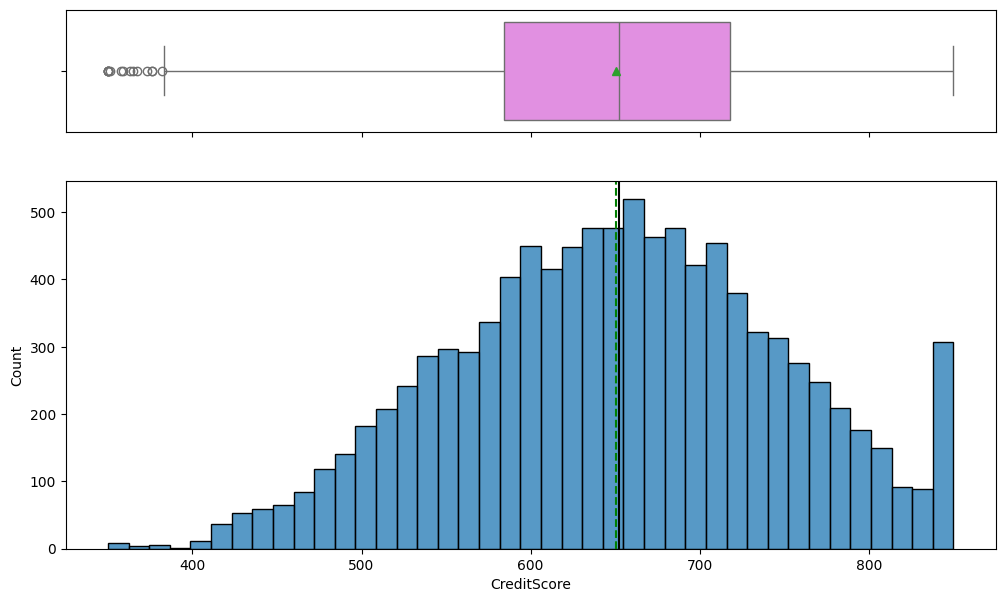

In [452]:
histogram_boxplot(Bank_df, 'CreditScore')

Observartions:
- CreditScore a left skewed distribution
- Mean and Median are pretty close and similar.
- There are outliers in the data.

**Observation on Age**

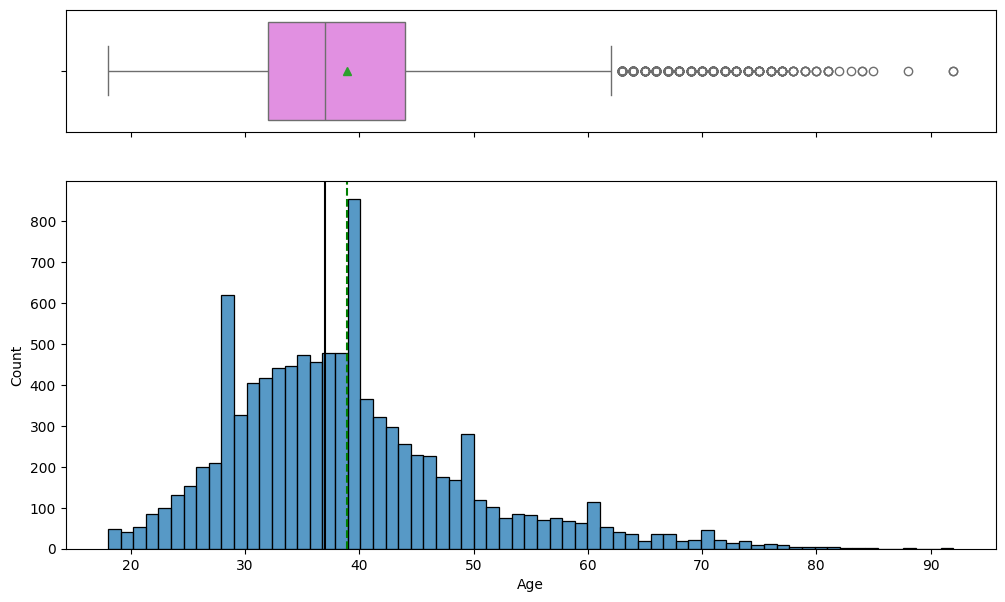

In [453]:
histogram_boxplot(Bank_df, 'Age')

Observations:
- Age is right skewed distribution
- There are outliers

**Observation on Tenure**

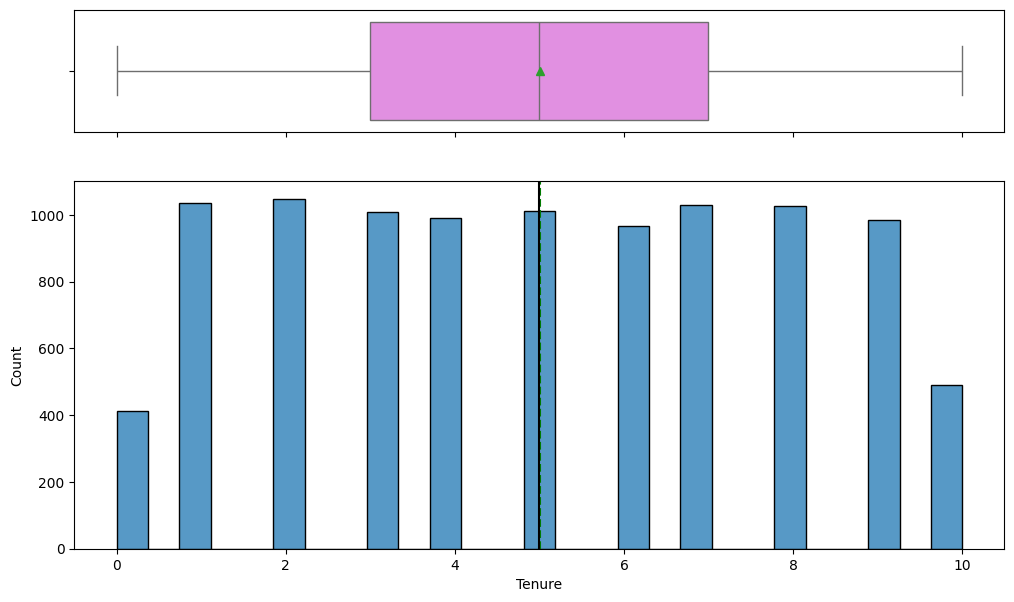

In [454]:
histogram_boxplot(Bank_df, 'Tenure')

Observations:
- Distribution is uniform
- There are no outliers
- Mean and median are around the same

**Observation on Balance**

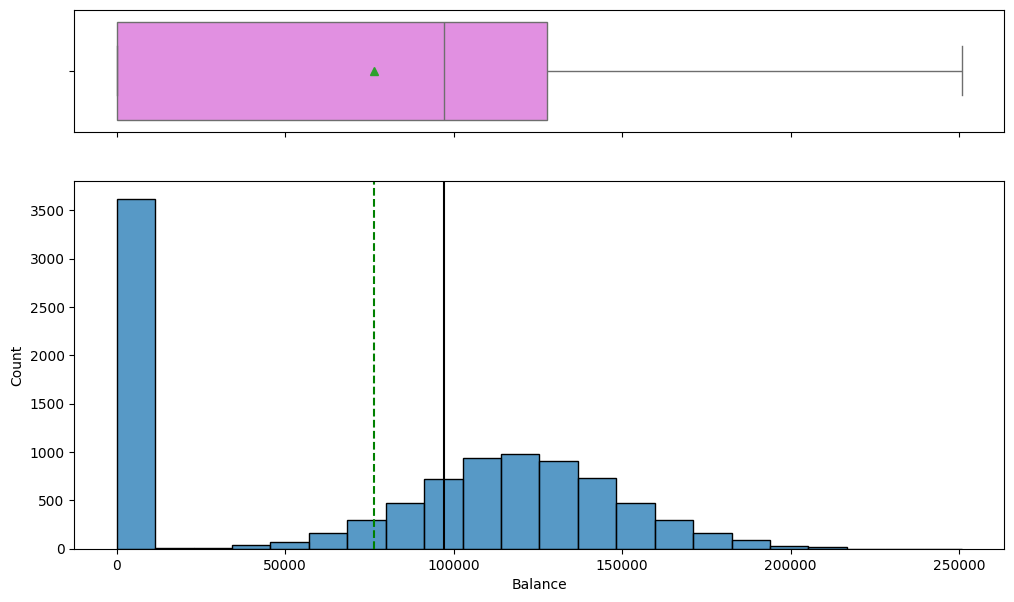

In [455]:
histogram_boxplot(Bank_df, 'Balance')

Observations:
- There are lot of customers(around 3600) with 0 balance
- distribution is right skewed

**Observation on NumOfProducts**

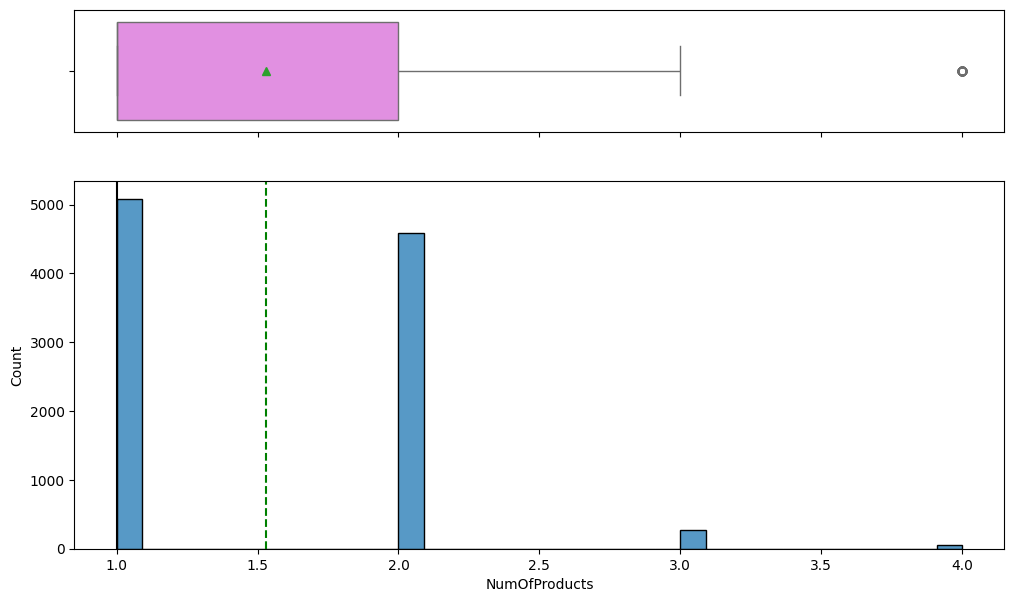

In [456]:
histogram_boxplot(Bank_df, 'NumOfProducts')

Observations:
- there are around 5000 customers using 1 product followed by customers who use 2 products
- There are few customers who use 3 and 4
- There is outlier

**Observation on HasCrCard**

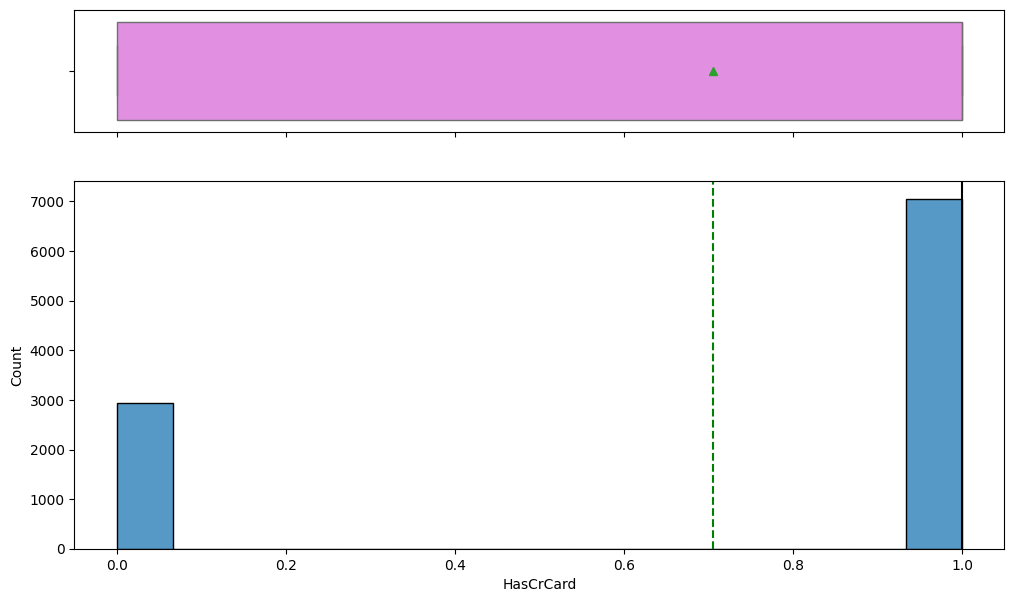

In [457]:
histogram_boxplot(Bank_df, 'HasCrCard')

Observations:
- There are around 7000 customers who have credit card and around 3000 customers who dont have credit card.

**Observation on IsActiveMember**

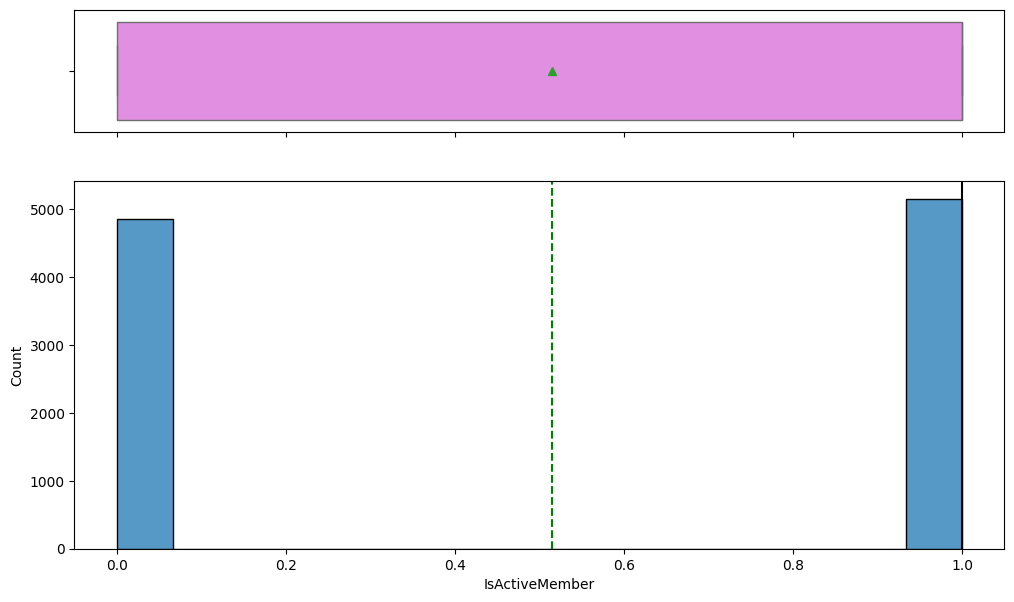

In [458]:
histogram_boxplot(Bank_df, 'IsActiveMember')

Observations:
- Around 5100 customers are active customers and 4900 customers are inactive customers

**Observation on EstimatedSalary**

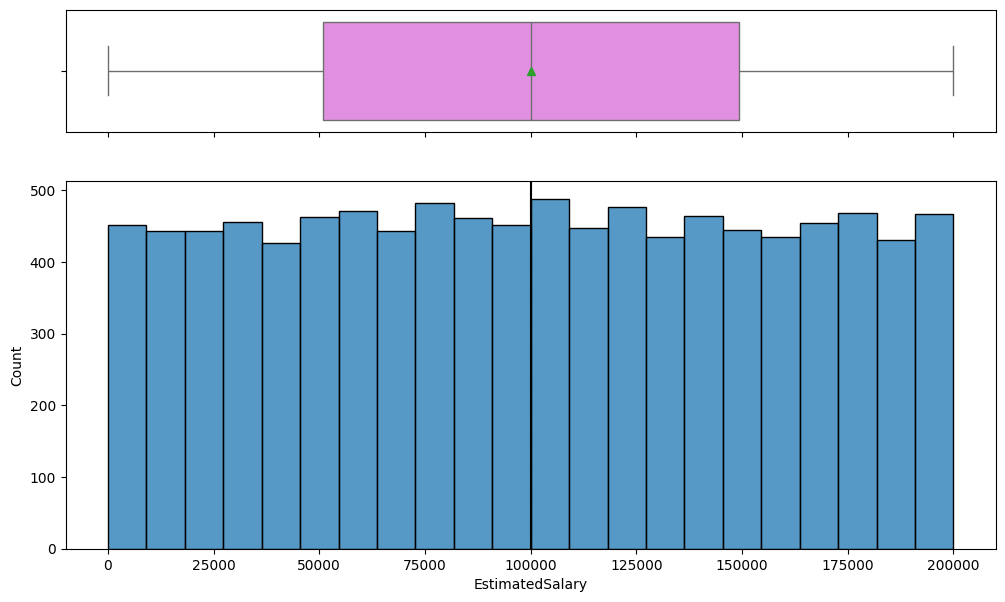

In [459]:
histogram_boxplot(Bank_df, 'EstimatedSalary')

Observations:
- Estimated salary is uniform distribution
- Mean and Median are similar.

**Observation on Exited**

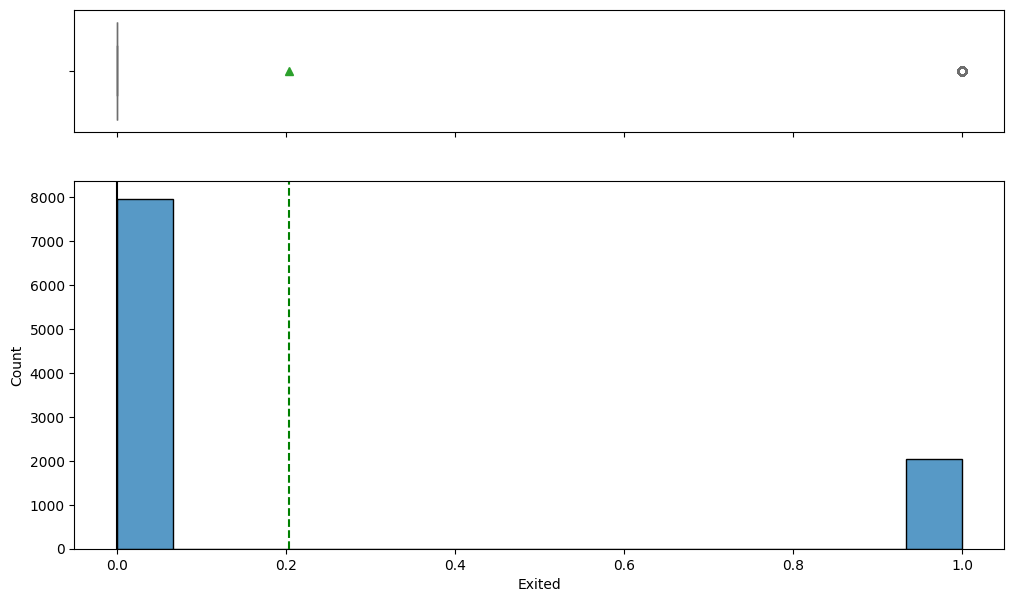

In [460]:
histogram_boxplot(Bank_df, 'Exited')

Observations:
- There are around 8000 customer who are with the bank and around 2000 customers who have exited.

In [461]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Observation on Geography**

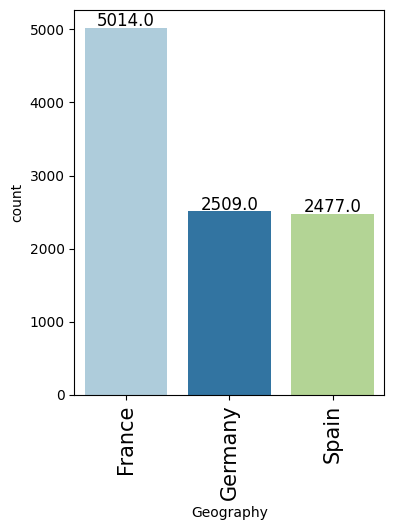

In [462]:
labeled_barplot(Bank_df, 'Geography')

Observations:
- Customers from France are the highest followed by Germany and Spain

**Observation on Gender**

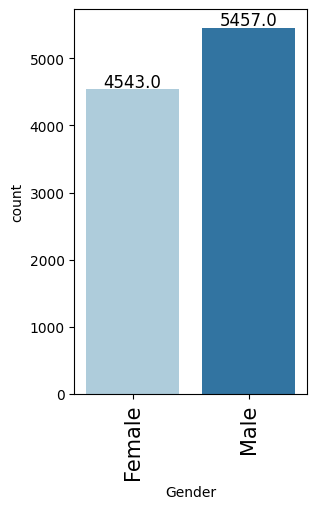

In [463]:
labeled_barplot(Bank_df, 'Gender')

Observations:
- Highest number of customers are male.

### Bivariate Analysis

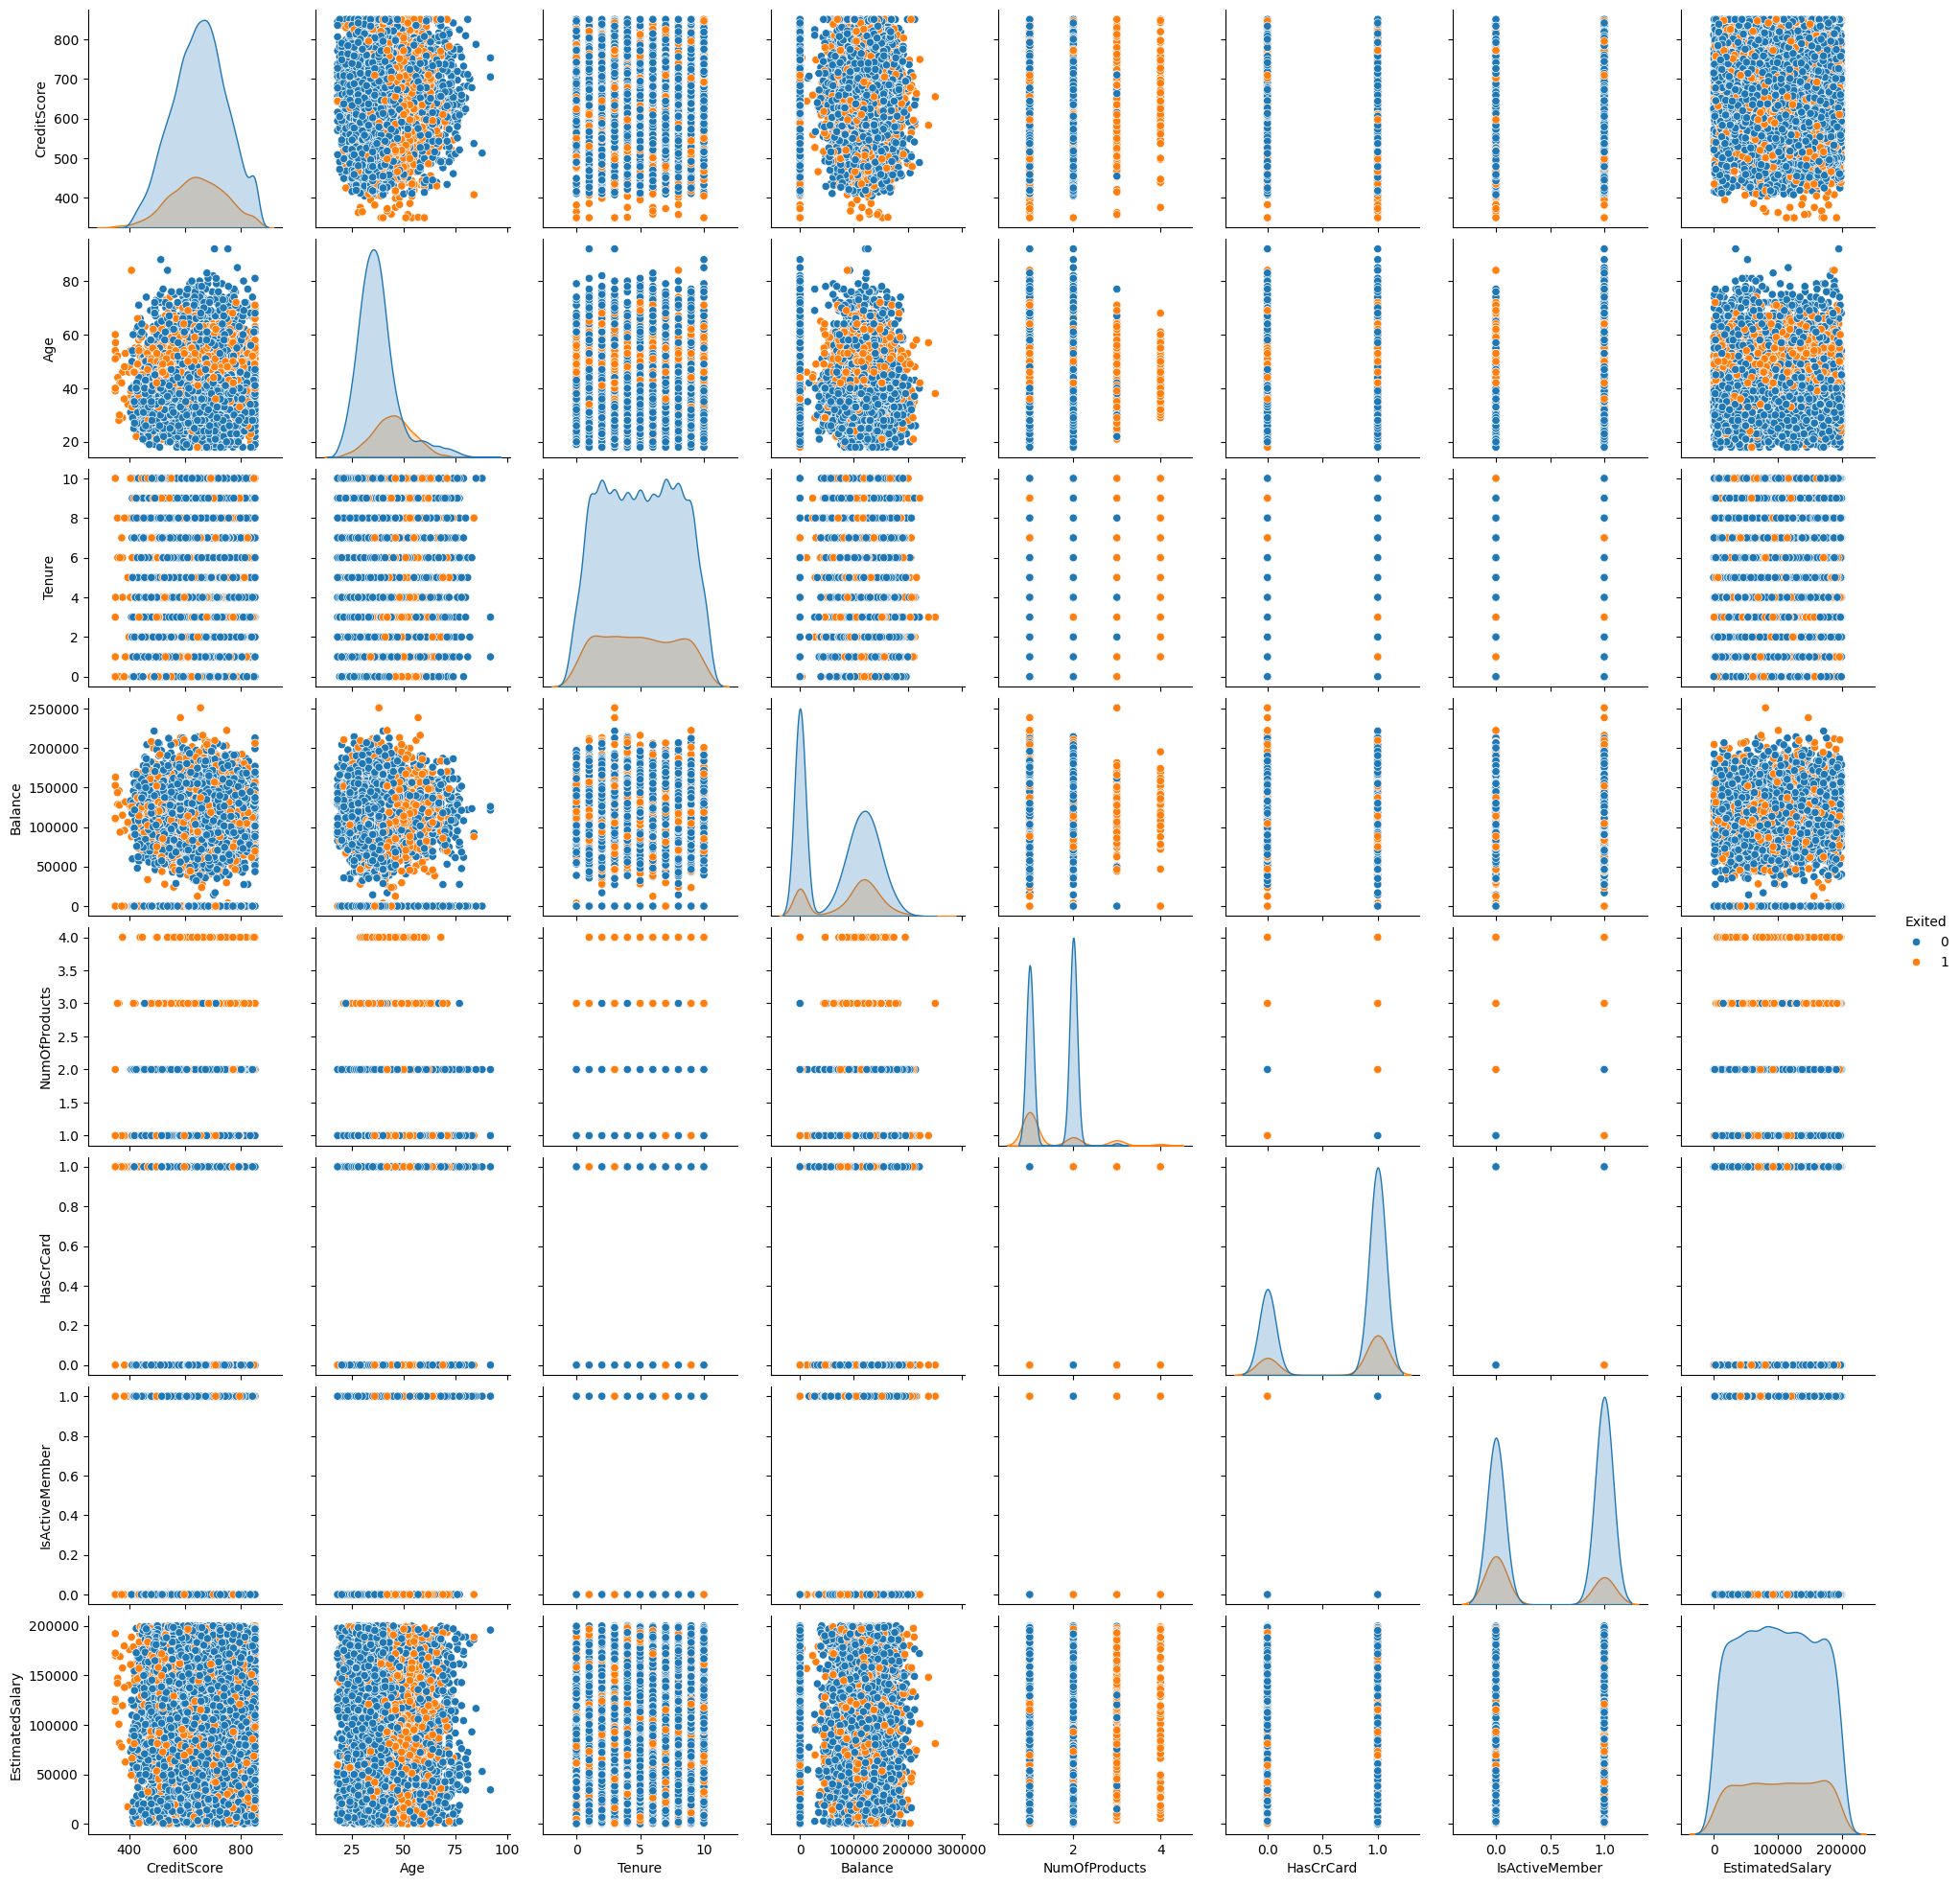

In [464]:
sns.pairplot(data=Bank_df,hue='Exited')

Observations:
- We do not see positive or negative correlation from pairplot.

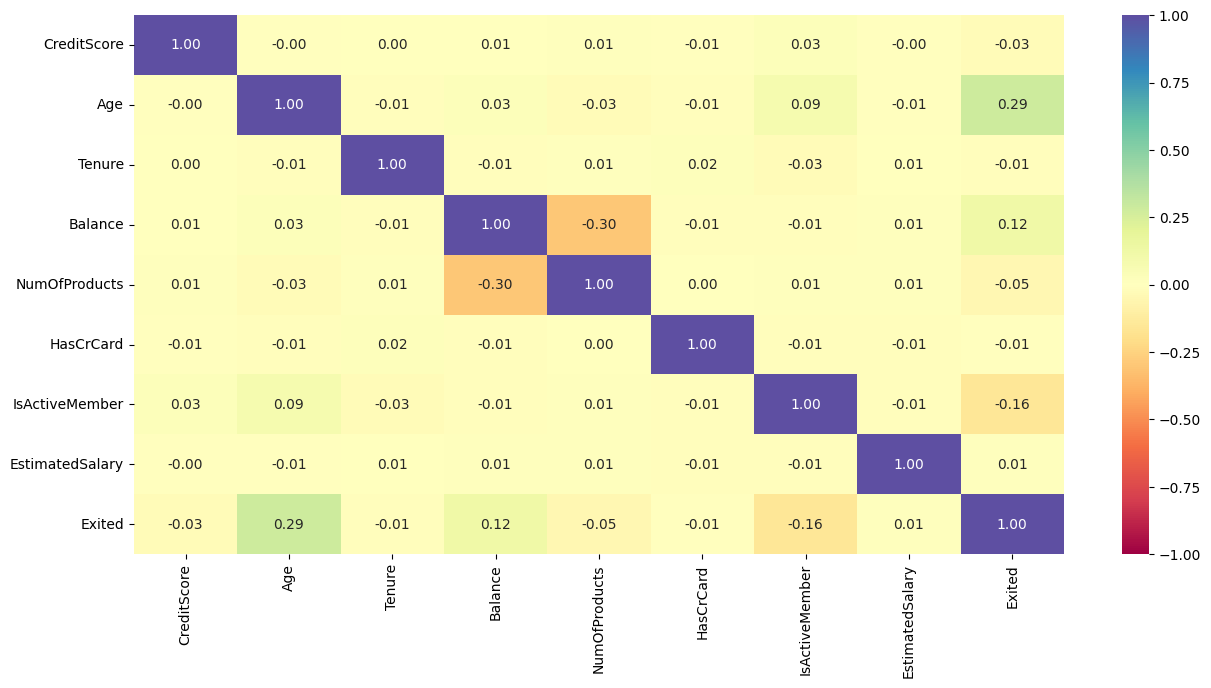

In [465]:
plt.figure(figsize=(15, 7))
numeric_df = Bank_df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
- From heatmap we observe some postive and negative correlation although none of them are highly correlated.

Positive correlation:
- Age and Exited

Negative Correlation:
- Balance and NumOfProducts

### Analysis of relationships of all variables on target variable

**Relationship of categorical variables on Target variable**


Geography vs Exited

Gender vs Exited

In [466]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Geography vs Exited

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


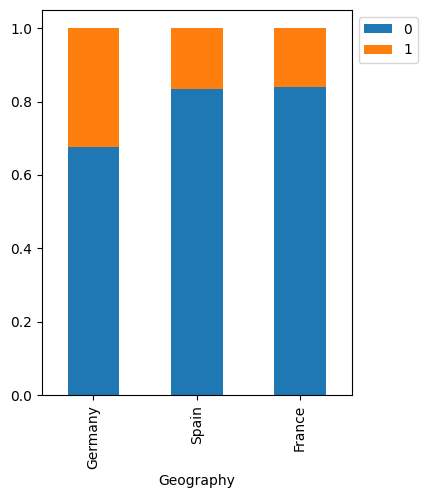

In [467]:
stacked_barplot(Bank_df, 'Geography', 'Exited')

Observations:
- There is more customer churn in Germany.Exited customers distribution in Spain and France are very similar

Gender vs Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


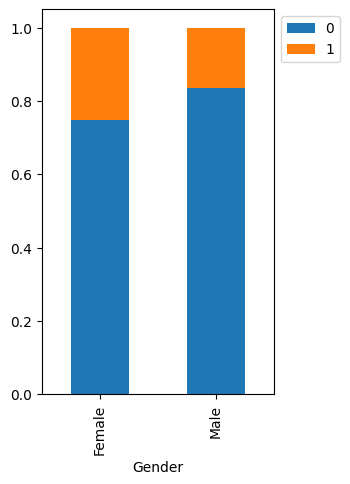

In [468]:
stacked_barplot(Bank_df, 'Gender', 'Exited')

Observations:
- More Female customers have churned.

**Relationship of numerical variables on target variable**

CreditScore vs Exited

Age vs Exited

Tenure vs Exited

Balance vs Exited

NumOfProducts vs Exited

HasCrCard vs Exited

IsActiveMember vs Exited

EstimatedSalary vs Exited


In [469]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Age vs Exited**


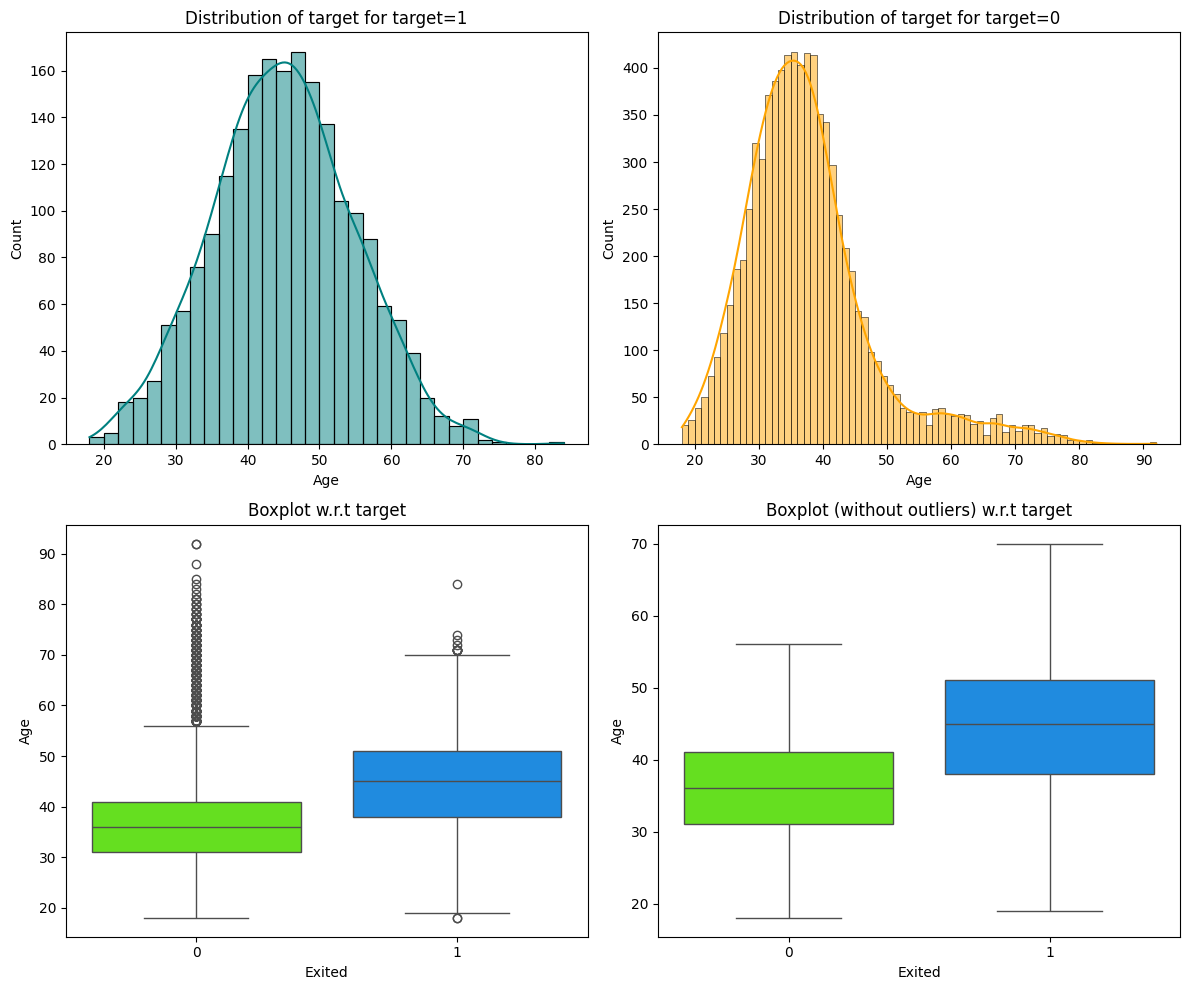

In [470]:
distribution_plot_wrt_target(Bank_df, 'Age', 'Exited')

Observations
- Distribution of Age is uniform for exiting customers
- Distribution of Age is right skewed for customers who stay with the bank
- There are outliers in both exited/not exited customers

**Tenure vs Exited**



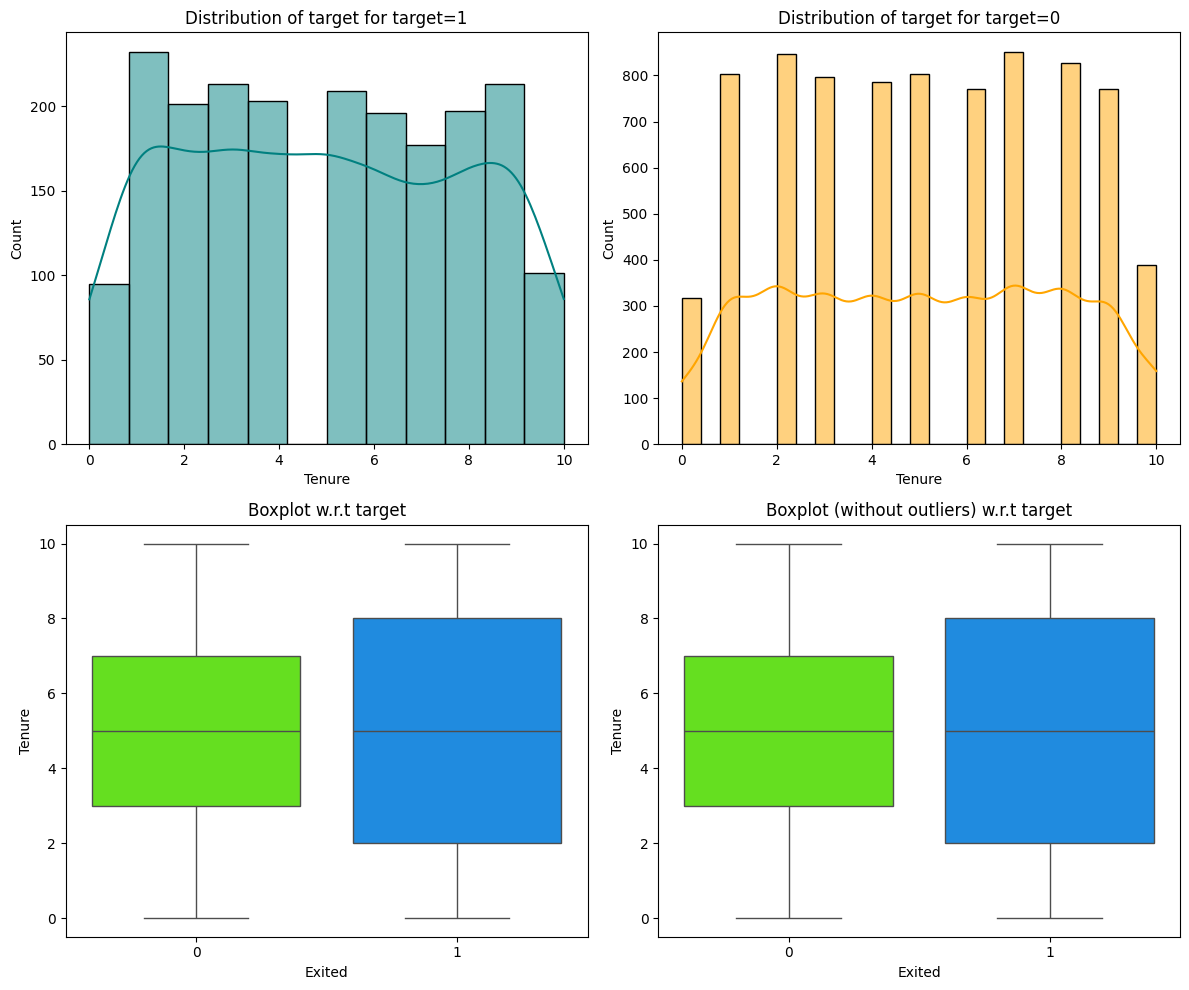

In [471]:
distribution_plot_wrt_target(Bank_df, 'Tenure', 'Exited')

Observations:
- Tenure, distribution is uniform for both exited/not exited customers
- There are no outliers
- Median is similar for both customer categories


**Balance vs Exited**


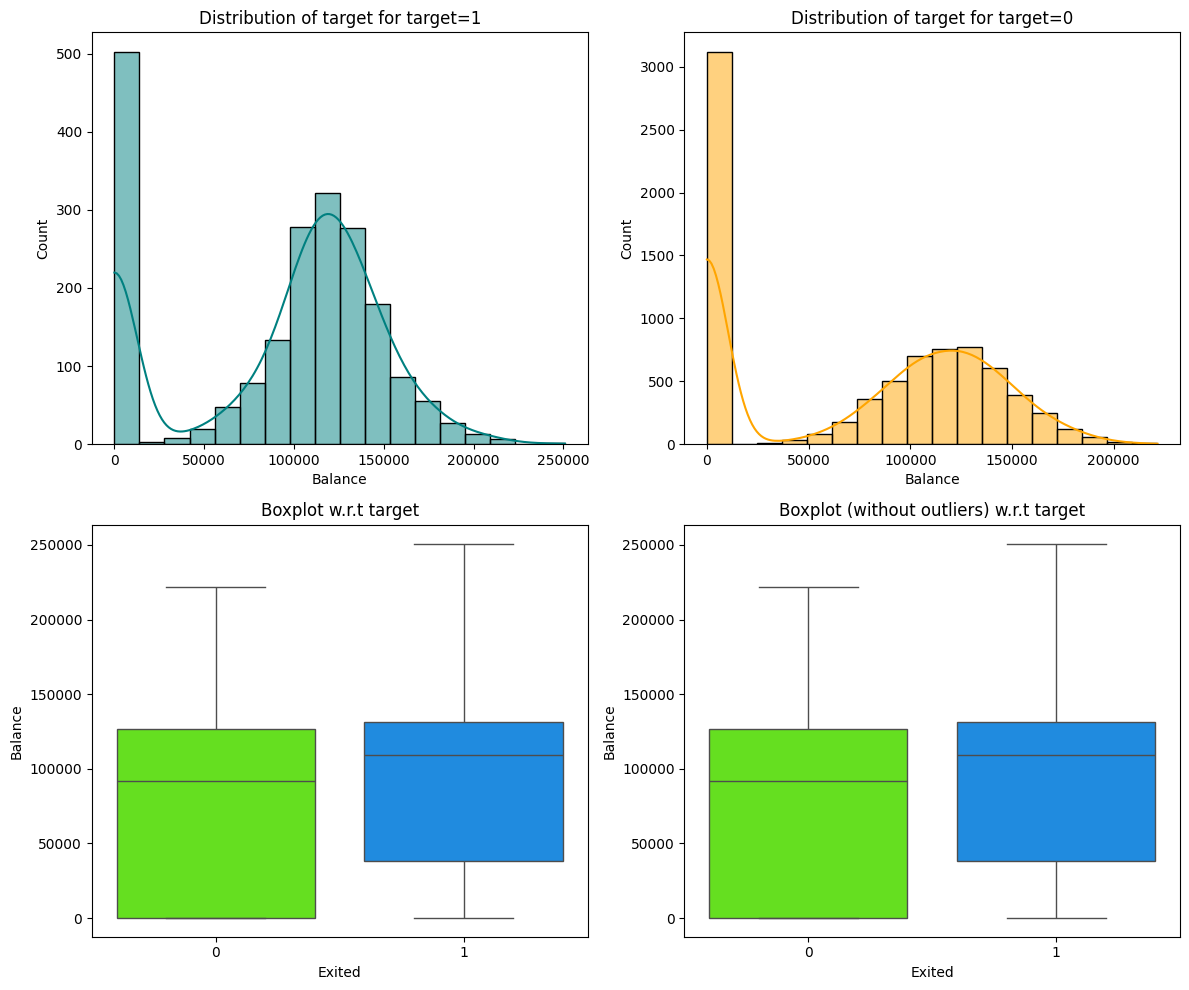

In [472]:
distribution_plot_wrt_target(Bank_df, 'Balance', 'Exited')

Observations:
- Large no. of customers have 0 balance in both exited/not exited categories
- There are no outliers
- Median balance of exited customer is higher than median balance of customers who didnt exit

**NumOfProducts vs Exited**

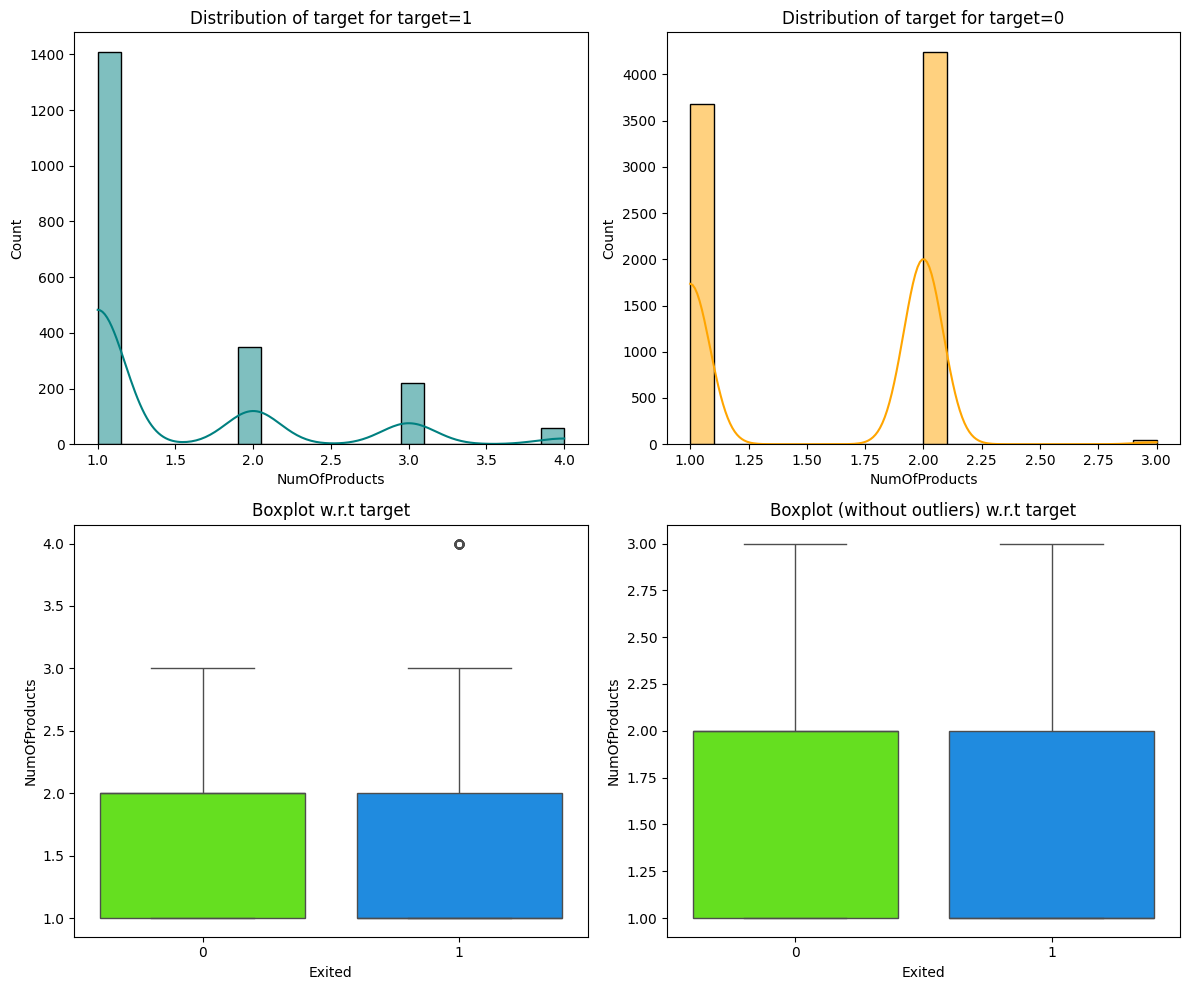

In [473]:
distribution_plot_wrt_target(Bank_df, 'NumOfProducts', 'Exited')

Observations:
- Exited customers had used 1 product most with the bank.
- Not exited customers use 2 products most

**HasCrCard vs Exited**

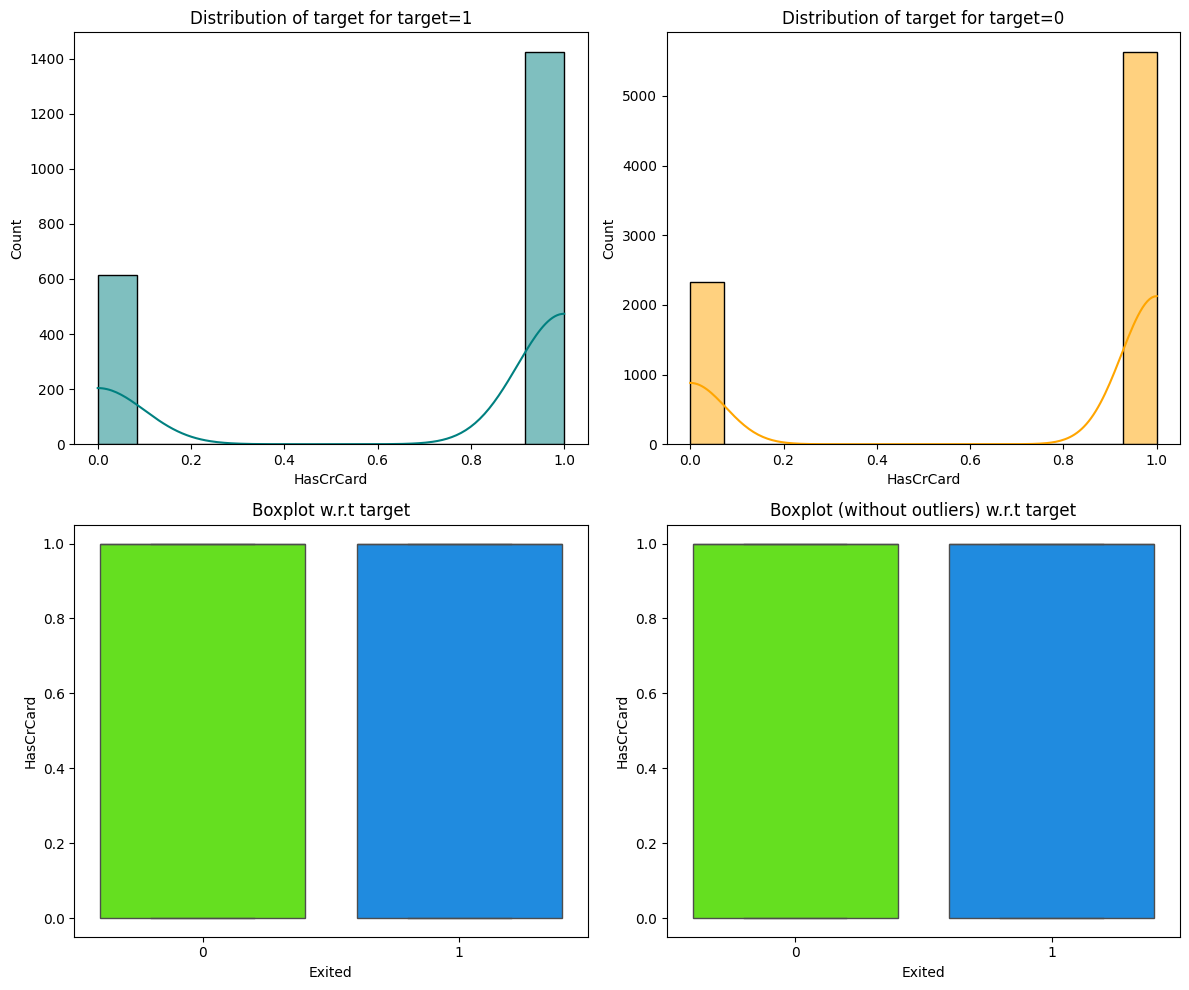

In [474]:
distribution_plot_wrt_target(Bank_df, 'HasCrCard', 'Exited')

Observations:
- Distribution is similar for both exited/not exited customers
- highest no of customer have 1 creditcard


**IsActiveMember vs Exited**

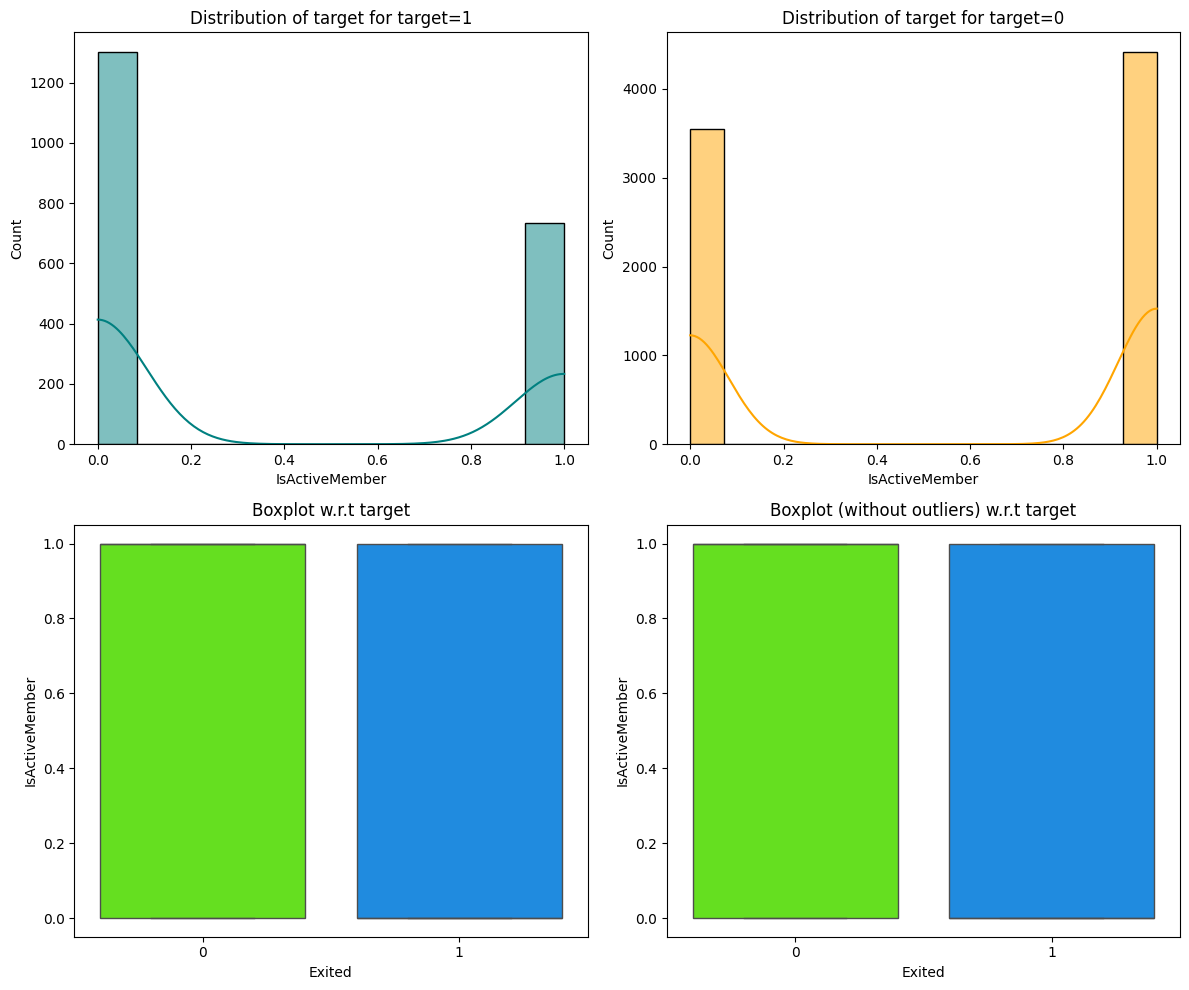

In [475]:
distribution_plot_wrt_target(Bank_df, 'IsActiveMember', 'Exited')

Observations:

Exited customers - Highest no. of customers were not active members

Customers who have stayed - Highest no. of customers are active members


**EstimatedSalary vs Exited**


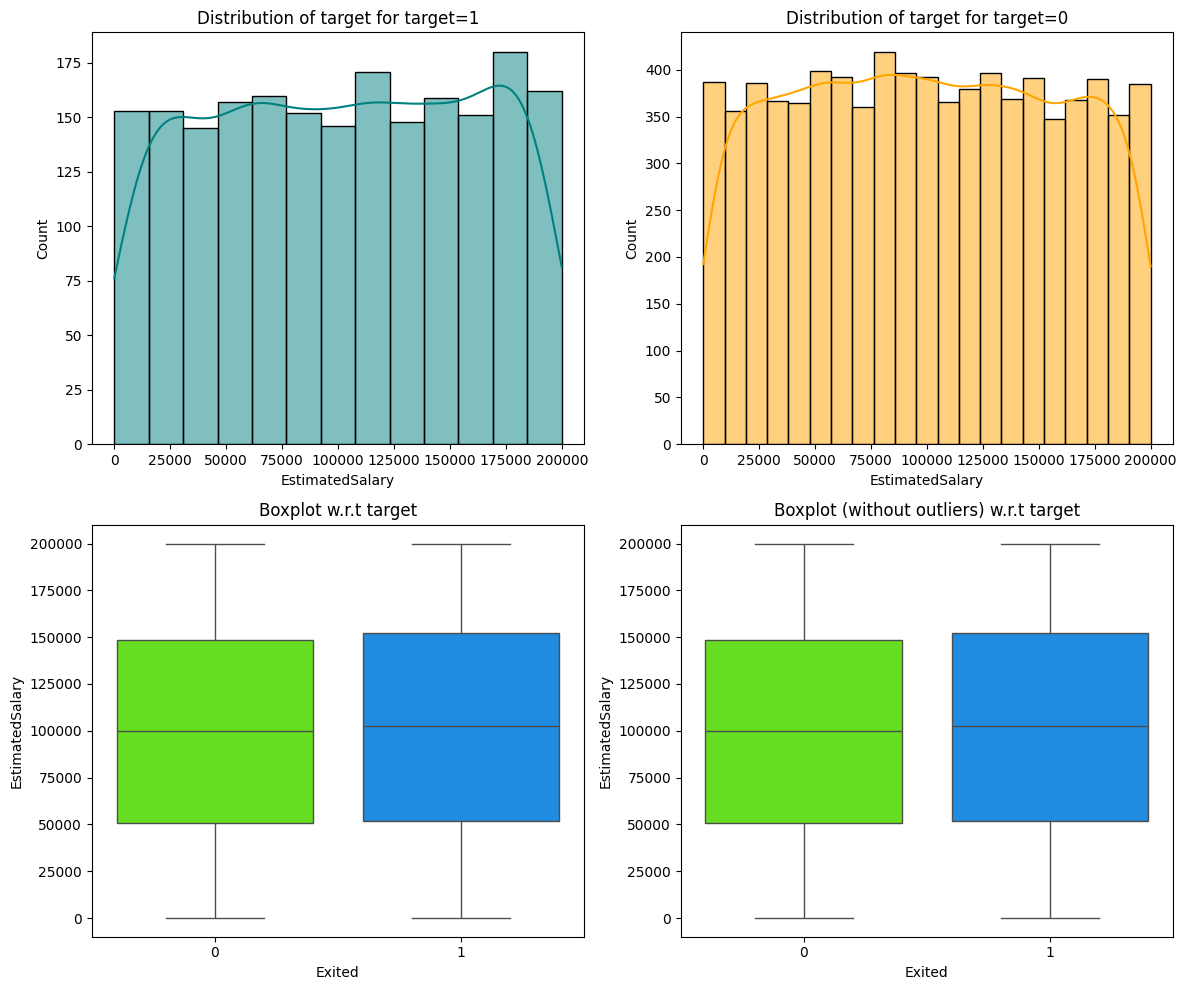

In [476]:
distribution_plot_wrt_target(Bank_df, 'EstimatedSalary', 'Exited')

Observations:
- Estimated Salary is uniform distribution for both customer categories
- Median salary is the same for both customer categories
- There are no outliers

### EDA Summary

- There are 10,000 rows and 14 columns.
- There are 11 numerical columns and 3 object column.
- There are no null values.
- There are 79.63% customers who did not leave the bank.
- There are 20.37% customers who left the bank.
- This is an imbalanced dataset.

**Univariate Analysis Summary**
- CreditScore
   - CreditScore a left skewed distribution
   - Mean and Median are pretty close and similar.
   - There are outliers in the data.

- Age
   - Age is right skewed distribution
   - There are outliers

- Balance
   - There are lot of customers(around 3600) with 0 balance
   - distribution is right skewed

- NumOfProducts
   - there are around 5000 customers using 1 product followed by customers who use 2 products

- HasCrCards
   - There are around 7000 customers who have credit card and around 3000 customers who dont have credit card.

- isActiveMember
   - Around 5100 customers are active customers and 4900 customers are inactive customers

- EstimatedSalary
   - Estimated salary is uniform distribution
Mean and Median are similar.

- Exited
   - There are around 8000 customer who are with the bank and around 2000 customers who have exited.

- Geography
   - Customers from France are the highest followed by Germany and Spain

- Gender
   - Highest number of customers are male.

**Bivariate Analysis Summary**

From heatmap we observe some postive and negative correlation although none of them are highly correlated.

Positive correlation:

- Age and Exited

Negative Correlation:

- Balance and NumOfProducts

**Key relationships with target variable**

- NumOfProducts vs Exited
   - Exited customers had used 1 product most with the bank.
   - Not exited customers use 2 products most

- isActiveMember
   - Exited customers - Highest no. of customers were not active members
   - Customers who have stayed - Highest no. of customers are active members


## Data Preprocessing

In [477]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


**Remove Surname**

There are 2932 unique surnames in the dataset.Surname will not add value to the dataset and will not predict customer churn.

In [478]:
#remove Surname
Bank_df.drop(['Surname'], axis=1, inplace=True)

**Outlier detection and treatment**

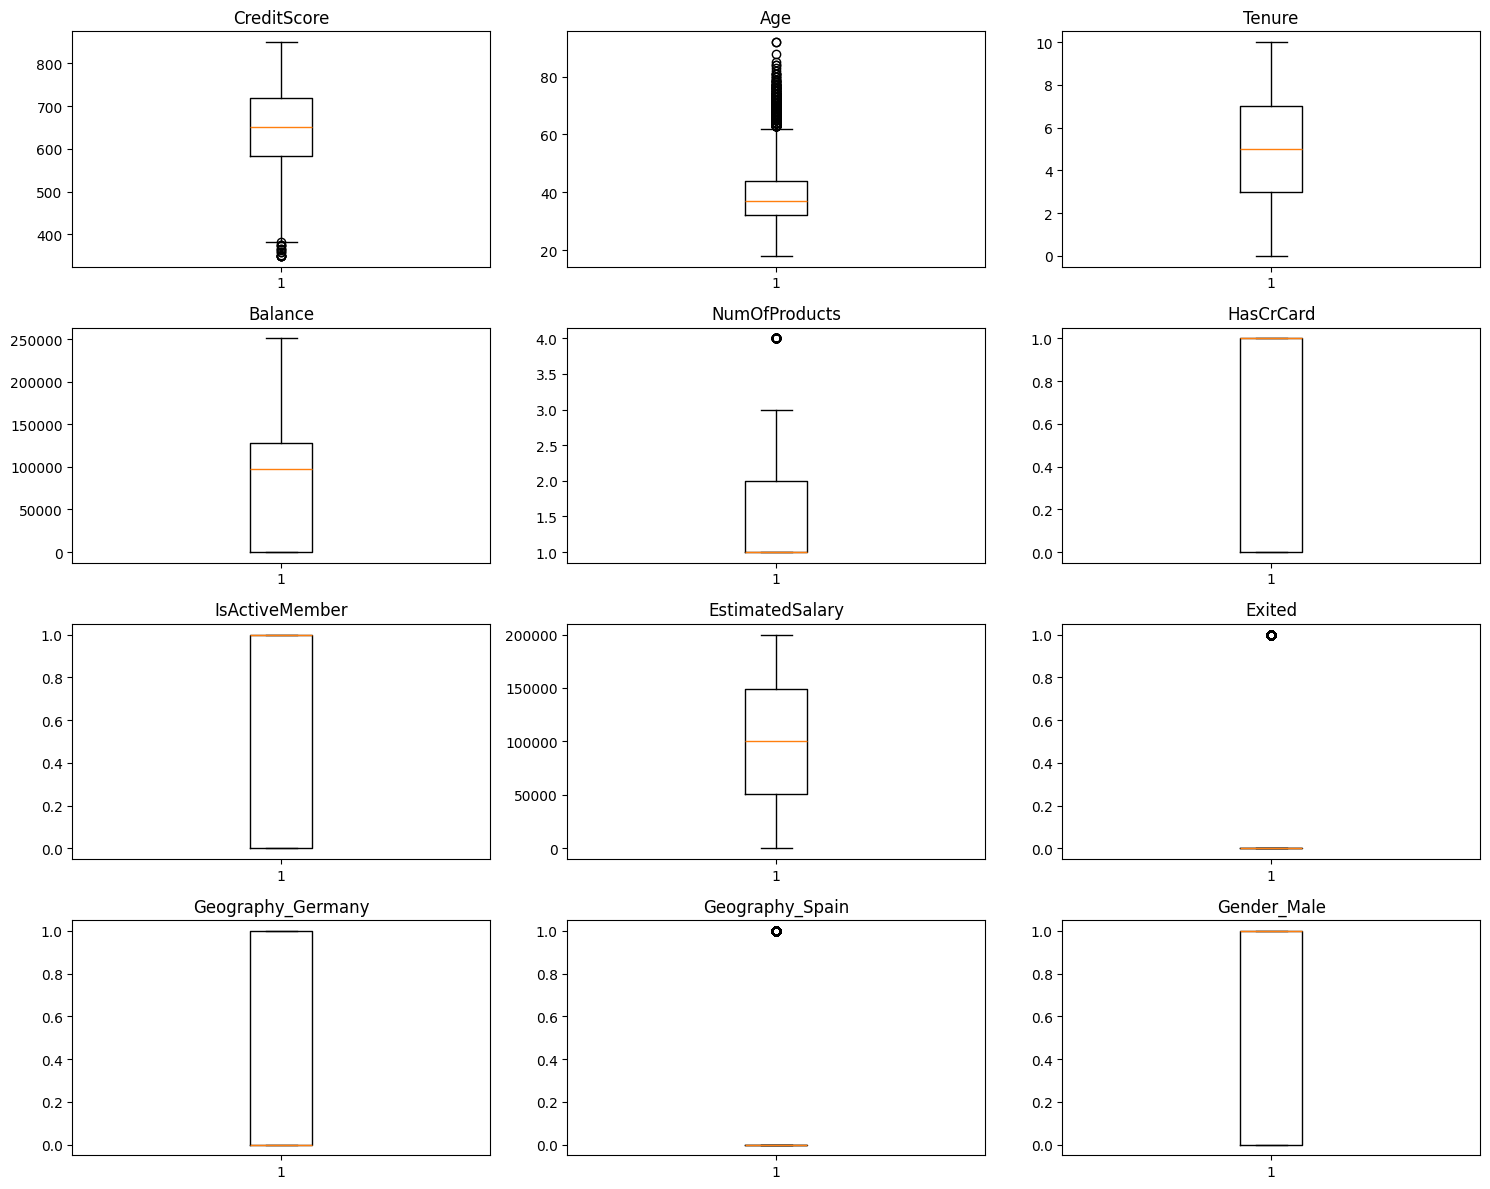

In [636]:
# outlier detection using boxplot
numeric_columns = Bank_df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(Bank_df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:
- Age, CreditScore,NumOfProducts have outliers
- They are all valid and we will not treat the outliers.

### Dummy Variable Creation

In [479]:
dummy_cols = ['Geography', 'Gender']
Bank_df = pd.get_dummies(Bank_df, columns=dummy_cols, drop_first=True)
Bank_df = Bank_df.astype(float)

In [480]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  float64
 6   IsActiveMember     10000 non-null  float64
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  float64
 9   Geography_Germany  10000 non-null  float64
 10  Geography_Spain    10000 non-null  float64
 11  Gender_Male        10000 non-null  float64
dtypes: float64(12)
memory usage: 937.6 KB


In [481]:
X = Bank_df.drop(['Exited'], axis=1)
y = Bank_df['Exited']

### Train-validation-test Split

In [482]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1,stratify = y)

In [483]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 1,stratify = y_train)

In [484]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


### Data Normalization

Columns that we dont need to normalize
- HasCrCard - value 0 or 1. values already in the limited range.
- IsActiveMember - value 0 or 1. Values already in limited range.
- Exited - Target variable and should not be normalized
- Geography_Germany, Geography_Spain, Gender_Male - One-hot encoded features and are already in a normalized range.

In [485]:
normalize_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

scaler = StandardScaler()
scaler.fit(X_train[normalize_cols])


StandardScaler()

Once the scaler object fits on the data using the fit() method, it stores the parameters (mean and standard deviation) for normalization based on the training data

We then use these parameters to normalize the validation and test data.

In [486]:
X_train[normalize_cols] = scaler.transform(X_train[normalize_cols])
X_val[normalize_cols] = scaler.transform(X_val[normalize_cols])
X_test[normalize_cols] = scaler.transform(X_test[normalize_cols])

In [487]:
X_train.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
5292     0.976155 -1.047381  0.347046 -1.212523       0.796050        1.0   
3879     1.316949 -0.572048  1.377238  1.214872       0.796050        0.0   
6118    -0.190810  0.949016  0.003649  1.473810      -0.912441        0.0   
4044     0.077695 -0.667115  1.033841 -1.212523      -0.912441        1.0   
3202    -0.893054 -0.572048 -0.339749  0.961751      -0.912441        1.0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
5292             0.0         0.939366                0.0              0.0   
3879             0.0         1.389376                0.0              0.0   
6118             0.0         0.692477                0.0              0.0   
4044             1.0        -0.347954                0.0              0.0   
3202             0.0        -0.647963                0.0              0.0   

      Gender_Male  
5292          0.0  
3879          0.0  
6118          0.0  
4044          1.0  
3202          0.0

**Utility Functions**

In [488]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [489]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

**Model can make wrong predictions as:**

Model predicts that the customer will exit the bank,but the customer doesnt exit the bank - FP

Models predicts that the customer will not exit the bank, but the customer exit the bank - FN

**Which case is more important?**
Failing to predict the customer will exit the bank could result in loosing the customer(FN)

**How to reduce this loss?**

Maximize Recall to reduce False Negatives.


In [490]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6400 entries, 5292 to 4847
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6400 non-null   float64
 1   Age                6400 non-null   float64
 2   Tenure             6400 non-null   float64
 3   Balance            6400 non-null   float64
 4   NumOfProducts      6400 non-null   float64
 5   HasCrCard          6400 non-null   float64
 6   IsActiveMember     6400 non-null   float64
 7   EstimatedSalary    6400 non-null   float64
 8   Geography_Germany  6400 non-null   float64
 9   Geography_Spain    6400 non-null   float64
 10  Gender_Male        6400 non-null   float64
dtypes: float64(11)
memory usage: 600.0 KB


In [491]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### Model 0 - Neural Network with SGD Optimizer(without class weights)

- Let's start with a neural network consisting of
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [492]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [493]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [494]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [495]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [496]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8444 - val_loss: 0.6672
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6426 - val_loss: 0.5911
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5805 - val_loss: 0.5559
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5504 - val_loss: 0.5366
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5335 - val_loss: 0.5250
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5233 - val_loss: 0.5177
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5168 - val_loss: 0.5129
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5125 - val_loss: 0.5096
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5095 - val_loss: 0.5073
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5073 - val_loss: 0.5055
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5057 - val_loss: 0.5041
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [497]:
print("Time taken in seconds ",end-start)

Time taken in seconds  9.274894714355469


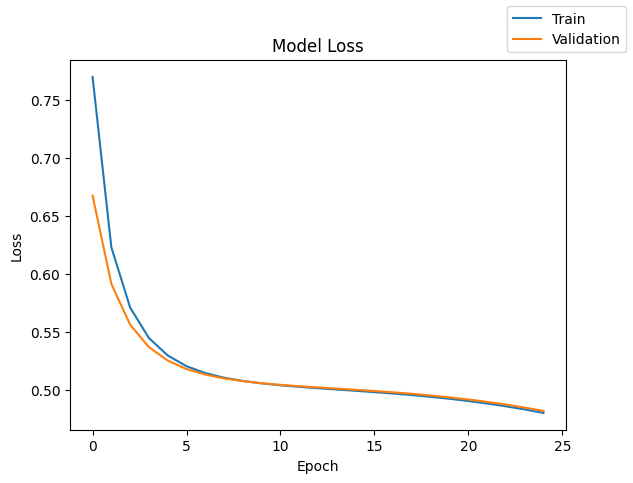

In [498]:
plot(history,'loss')

In [499]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy   Recall  Precision  F1 Score
0   0.79625  0.79625   0.634014  0.705931

In [500]:
model_0_val_perf = model_performance_classification(model, X_val, y_val)
model_0_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy   Recall  Precision  F1 Score
0   0.79625  0.79625   0.634014  0.705931

Observations:
- Recall score is .79625 in training and 0.79625 with validation dataset.


### Model 1 - Neural Network with SGD Optimizer(class weights)

Using class weights even though the dataset is mild imbalance

In [501]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

In [502]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [503]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [504]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [505]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [506]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5033 - val_loss: 0.6950
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3686 - val_loss: 0.6606
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3159 - val_loss: 0.6350
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2756 - val_loss: 0.6129
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2417 - val_loss: 0.5953
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2144 - val_loss: 0.5810
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1912 - val_loss: 0.5686
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1702 - val_loss: 0.5570
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1499 - val_loss: 0.5464
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1294 - val_loss: 0.5358
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1093 - val_loss: 0.5264
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [507]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.794859409332275


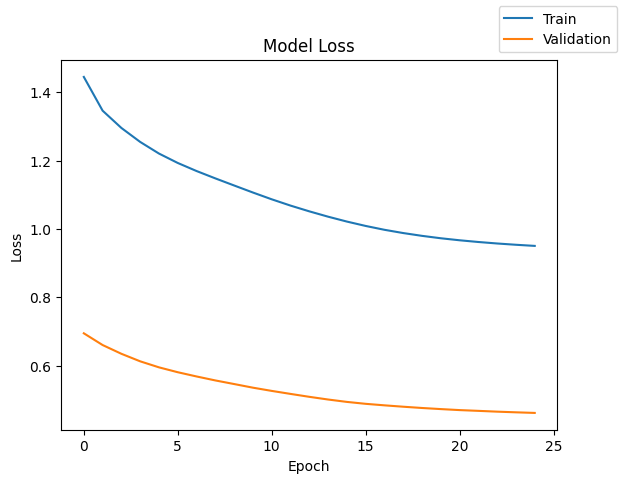

In [508]:
plot(history,'loss')

In [509]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0    0.7775  0.7775   0.832367  0.793818

In [510]:
model_1_val_perf = model_performance_classification(model, X_val, y_val)
model_1_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy   Recall  Precision  F1 Score
0   0.78125  0.78125   0.833338  0.796914

Observations:
- Recall for training is 0.7775 and 0.78125 for validation dataset.
- Model without adding class weights performed better.

Add momentum to the model with class weights

### Model 2 - Neural Network with SGD Optimizer(class weights) with Momentum

In [511]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [512]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [513]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [514]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [515]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2809 - val_loss: 0.4968
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0510 - val_loss: 0.4650
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9729 - val_loss: 0.4542
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9509 - val_loss: 0.4452
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9383 - val_loss: 0.4407
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9310 - val_loss: 0.4364
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9255 - val_loss: 0.4352
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9212 - val_loss: 0.4337
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9203 - val_loss: 0.4317
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9176 - val_loss: 0.4301
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9156 - val_loss: 0.4289
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [516]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.847717523574829


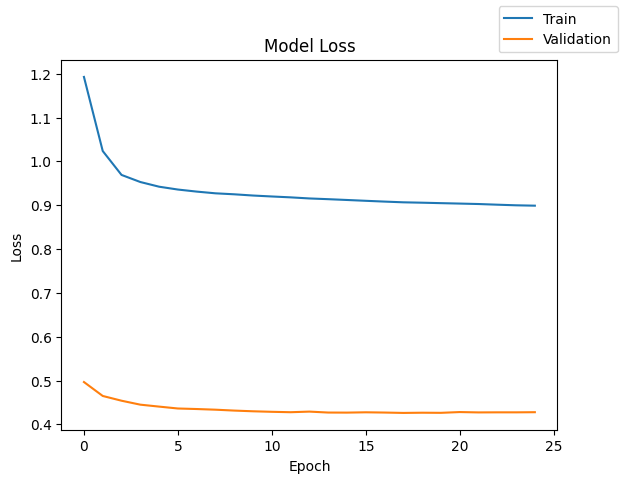

In [517]:
plot(history,'loss')

In [518]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.812031  0.812031   0.845554  0.822852

In [519]:
model_2_val_perf = model_performance_classification(model, X_val, y_val)
model_2_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.803125  0.803125   0.833083  0.813496

Observations:
- After adding momentum, we see the Model has generalised better when compared to the other 2 models.
- Recall is 0.812031 for training dataset and 0.803125 for validation dataset

Lets do model performance improvement

## Model Performance Improvement

Build a model using Adam optimizer

### Model 3 - Neural Network with Adam Optimizer

In [520]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [521]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [522]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [523]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [524]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7392 - val_loss: 0.5363
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5096 - val_loss: 0.4596
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4531 - val_loss: 0.4316
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4331 - val_loss: 0.4190
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4201 - val_loss: 0.4069
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4041 - val_loss: 0.3926
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3868 - val_loss: 0.3813
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3730 - val_loss: 0.3733
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3631 - val_loss: 0.3677
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3562 - val_loss: 0.3645
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3514 - val_loss: 0.3624
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [525]:
print("Time taken in seconds ",end-start)

Time taken in seconds  13.720810174942017


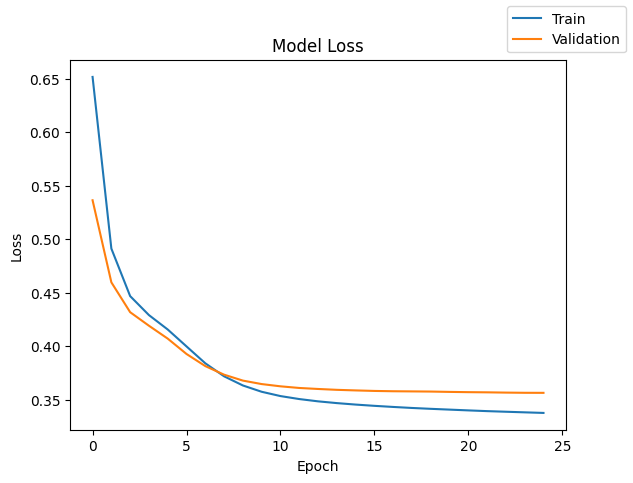

In [526]:
plot(history,'loss')

In [527]:
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.859688  0.859688   0.851531  0.843477

In [528]:
model_3_val_perf = model_performance_classification(model, X_val, y_val)
model_3_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0    0.8475  0.8475   0.836086  0.827564

Observations:
- Recall for training is 0.859668 and 0.8475 for validation dataset.
- We see that the error continues to decrease as epoch increases.
- So next step is to build the model with different Epoch and Batch size.

### Model 4 - Neural Network with Adam Optimizer(Change Epoch and Batch Size)


In [529]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [530]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [531]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [532]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [533]:
#choose new epoch and batch size
new_epochs = 50
new_batch_size = 100

In [534]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=new_batch_size, epochs=new_epochs)
end=time.time()

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6755 - val_loss: 0.5126
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4938 - val_loss: 0.4670
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4589 - val_loss: 0.4507
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4446 - val_loss: 0.4407
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4358 - val_loss: 0.4338
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4289 - val_loss: 0.4275
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4223 - val_loss: 0.4211
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4151 - val_loss: 0.4137
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4073 - val_loss: 0.4058
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3992 - val_loss: 0.3978
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3910 - val_loss: 0.3900
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3834 - val_lo

In [535]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.66175889968872


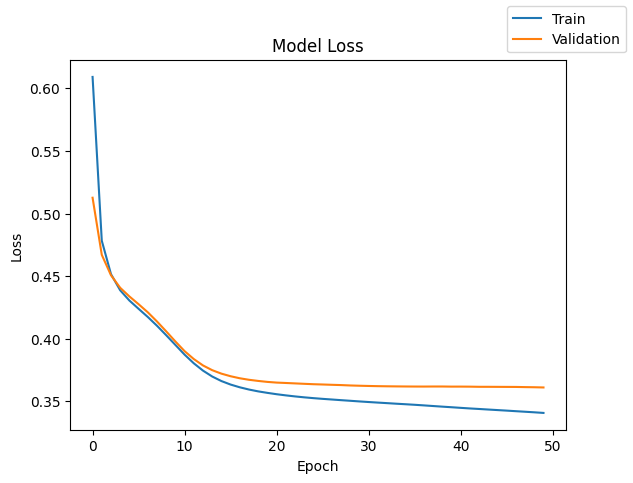

In [536]:
plot(history,'loss')

In [537]:
model_4_train_perf = model_performance_classification(model, X_train, y_train)
model_4_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.859062  0.859062   0.849094  0.846678

In [538]:
model_4_val_perf = model_performance_classification(model, X_val, y_val)
model_4_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.841875  0.841875   0.827511  0.826503

Observations:
- Model has not performed better with change in Epoch and Batch size
- Recall is 0.859062 for training set and 0.841875 for validation dataset.

### Model 5 - Neural Network with Adam Optimizer and Dropout

-Lets build a model with Adam Optimizer and dropout for both hidden layer(0.4,0.2)

In [539]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [540]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))   #add drop out
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))   # add drop out
model.add(Dense(1,activation="sigmoid"))

In [541]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [542]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [543]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7430 - val_loss: 0.6227
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6018 - val_loss: 0.4986
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5245 - val_loss: 0.4565
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4914 - val_loss: 0.4371
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4852 - val_loss: 0.4250
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4683 - val_loss: 0.4159
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4567 - val_loss: 0.4074
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4471 - val_loss: 0.3993
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4379 - val_loss: 0.3933
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4327 - val_loss: 0.3893
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4334 - val_loss: 0.3862
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [544]:
print("Time taken in seconds ",end-start)

Time taken in seconds  14.420158624649048


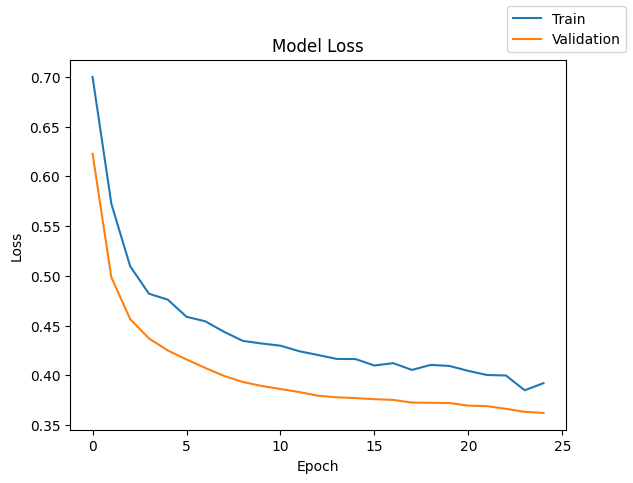

In [545]:
plot(history,'loss')

In [546]:
model_5_train_perf = model_performance_classification(model, X_train, y_train)
model_5_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.855313  0.855313   0.847971  0.835461

In [547]:
model_5_val_perf = model_performance_classification(model, X_val, y_val)
model_5_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy   Recall  Precision  F1 Score
0   0.84375  0.84375   0.832212  0.820695

Observations:
- With dropouts in hidden layer, there is no much change in the model performance.
- Recall is 0.855313 for training and 0.84375 for validation dataset.


### Model 6 - Neural Network with Adam Optimizer and Dropout(Only in one hidden layer)

In [548]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [549]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [550]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [551]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [552]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6932 - val_loss: 0.5447
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5411 - val_loss: 0.4891
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4926 - val_loss: 0.4599
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4649 - val_loss: 0.4448
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4590 - val_loss: 0.4360
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4523 - val_loss: 0.4292
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4360 - val_loss: 0.4226
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4338 - val_loss: 0.4164
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4259 - val_loss: 0.4105
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4215 - val_loss: 0.4055
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4113 - val_loss: 0.4007
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [553]:
print("Time taken in seconds ",end-start)

Time taken in seconds  12.597172021865845


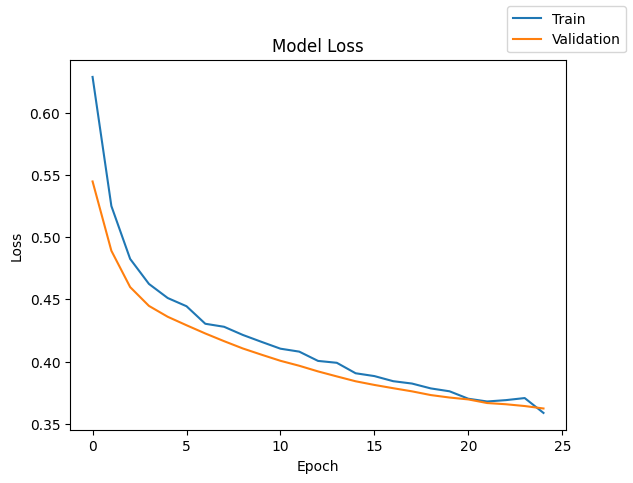

In [554]:
plot(history,'loss')

In [555]:
model_6_train_perf = model_performance_classification(model, X_train, y_train)
model_6_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.855938  0.855938   0.849774  0.835303

In [556]:
model_6_val_perf = model_performance_classification(model, X_val, y_val)
model_6_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.844375  0.844375   0.833886  0.820434

Observations:
- Model with 1 dropout is better than model with 2 dropouts
- Recall is 0.855938 for training and 0.844375 for validation dataset.
- Choose the model with 1 drop out and change the Epoch/Batch size

### Model 7 - Neural Network with Adam Optimizer, Dropout, Change Epochs and Batch Size

In [557]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [558]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [559]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [560]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [561]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=new_batch_size, epochs=new_epochs)
end=time.time()

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7084 - val_loss: 0.6315
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6045 - val_loss: 0.5308
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5220 - val_loss: 0.4807
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4940 - val_loss: 0.4591
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4704 - val_loss: 0.4410
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4599 - val_loss: 0.4257
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4394 - val_loss: 0.4147
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4296 - val_loss: 0.4043
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4141 - val_loss: 0.3953
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4088 - val_loss: 0.3877
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3962 - val_loss: 0.3816
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3971 - val_lo

In [562]:
print("Time taken in seconds ",end-start)

Time taken in seconds  17.837464570999146


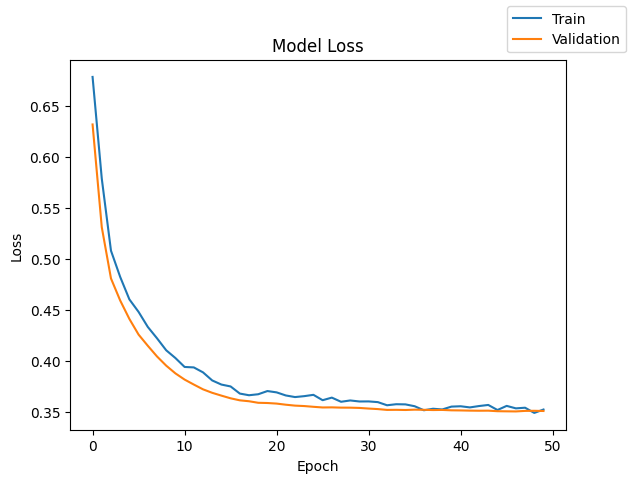

In [563]:
plot(history,'loss')

In [564]:
model_7_train_perf = model_performance_classification(model, X_train, y_train)
model_7_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.863906  0.863906   0.855526  0.850778

In [565]:
model_7_val_perf = model_performance_classification(model, X_val, y_val)
model_7_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0      0.85    0.85    0.83795  0.834656

Observations:
- Model with dropout on one hidden layer with increased epoc and batch size has generalised better than dropouts with 2 hidden layers and with less epocs/batch size.
- Recall is 0.863906 for training and 0.85 for validation dataset.

### Model 8 - Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [566]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [567]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 1304
Before OverSampling, count of label '0': 5096 

After OverSampling, count of label '1': 5096
After OverSampling, count of label '0': 5096 

After OverSampling, the shape of train_X: (10192, 11)
After OverSampling, the shape of train_y: (10192,) 



In [568]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [569]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [570]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [571]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [572]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7135 - val_loss: 0.6922
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6679 - val_loss: 0.6625
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6461 - val_loss: 0.6495
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6315 - val_loss: 0.6389
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6200 - val_loss: 0.6279
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6102 - val_loss: 0.6180
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6016 - val_loss: 0.6081
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5936 - val_loss: 0.5992
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5858 - val_loss: 0.5896
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5773 - val_loss: 0.5788
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5687 - val_loss: 0.5675
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [573]:
print("Time taken in seconds ",end-start)

Time taken in seconds  13.167799234390259


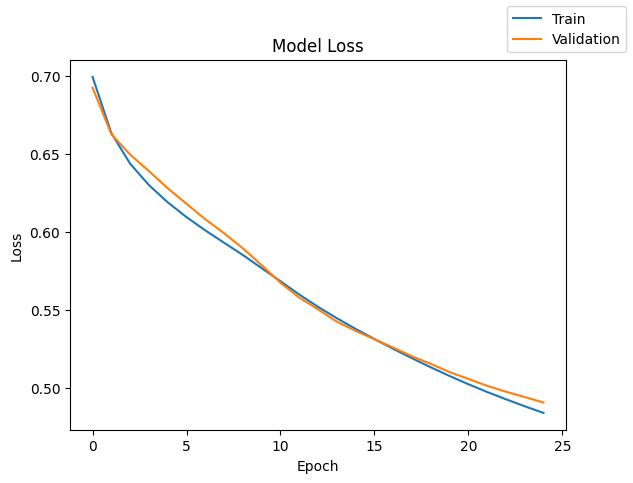

In [574]:
plot(history,'loss')

In [575]:
model_8_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_8_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.769231  0.769231   0.769428  0.769188

In [576]:
model_8_val_perf = model_performance_classification(model, X_val, y_val)
model_8_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0    0.7675  0.7675   0.834171  0.786109

Observations:
- Recall for training is 0.769231 and 0.7675 for validation dataset.
- Model hasnt performed well when compared to other models we have seen so far.

### Model 9 - Neural Network with Balanced Data (by applying SMOTE),SGD Optimizer,Change Epoch and Batch Size

Lets increase Epoch and Batch size

In [577]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [578]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [579]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [580]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [581]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=new_batch_size, epochs=new_epochs)
end=time.time()

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7575 - val_loss: 0.6570
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6945 - val_loss: 0.6733
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6774 - val_loss: 0.6765
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6673 - val_loss: 0.6730
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6585 - val_loss: 0.6659
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6491 - val_loss: 0.6565
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6388 - val_loss: 0.6453
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6280 - val_loss: 0.6334
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6169 - val_loss: 0.6210
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6055 - val_loss: 0.6087
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5944 - val_loss: 0.5963
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [582]:
print("Time taken in seconds ",end-start)

Time taken in seconds  21.994659900665283


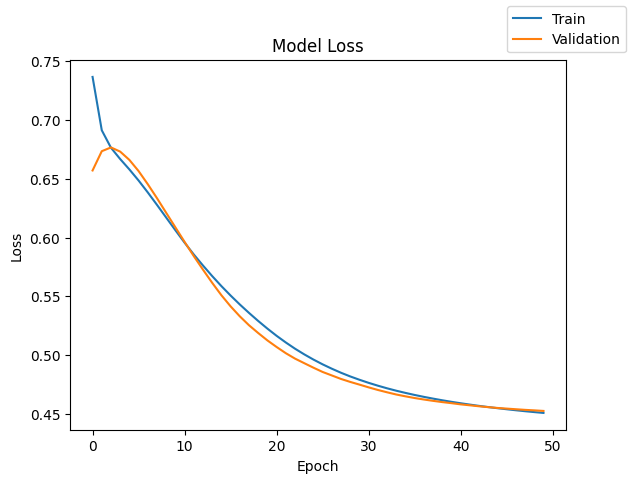

In [583]:
plot(history,'loss')

In [584]:
model_9_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_9_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.783458  0.783458   0.783461  0.783457

In [585]:
model_9_val_perf = model_performance_classification(model, X_val, y_val)
model_9_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy   Recall  Precision  F1 Score
0   0.78125  0.78125   0.832699   0.79681

Observations:
- Recall is 0.783458 for training and 0.78125 for validation dataset
- After increase in epoch,batchsize,its slightly better although the overal performance of the model is lower when compared to other models.

### Model 10 - Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [586]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [587]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [588]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [589]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [590]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6640 - val_loss: 0.5826
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5487 - val_loss: 0.5070
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4820 - val_loss: 0.4846
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4582 - val_loss: 0.4747
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4481 - val_loss: 0.4678
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4421 - val_loss: 0.4650
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4379 - val_loss: 0.4631
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4347 - val_loss: 0.4609
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4319 - val_loss: 0.4594
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4295 - val_loss: 0.4585
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4273 - val_loss: 0.4576
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [591]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.479286193847656


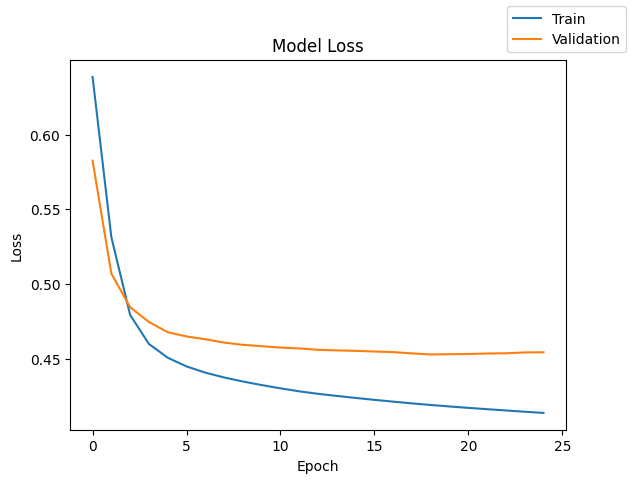

In [592]:
plot(history,'loss')

In [593]:
model_10_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_10_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.806711  0.806711   0.806722  0.806709

In [594]:
model_10_val_perf = model_performance_classification(model, X_val, y_val)
model_10_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.783125  0.783125   0.834075    0.7985

Observations:
- With SMOTE, and Adam Optimizer, the model has a recall score for 0.806711 for training dataset and 0.783125 for validation data set.



### Model 11 - Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, Change Epoch and Batch size

Lets increase the Epoch and Batch size

In [595]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [596]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [597]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [598]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [599]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=new_batch_size, epochs=new_epochs)
end=time.time()

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6808 - val_loss: 0.6191
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6003 - val_loss: 0.5546
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5423 - val_loss: 0.5180
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5048 - val_loss: 0.4968
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4811 - val_loss: 0.4829
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4668 - val_loss: 0.4735
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4580 - val_loss: 0.4683
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4523 - val_loss: 0.4636
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4481 - val_loss: 0.4617
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4446 - val_loss: 0.4592
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4415 - val_loss: 0.4572
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [600]:
print("Time taken in seconds ",end-start)

Time taken in seconds  27.989372491836548


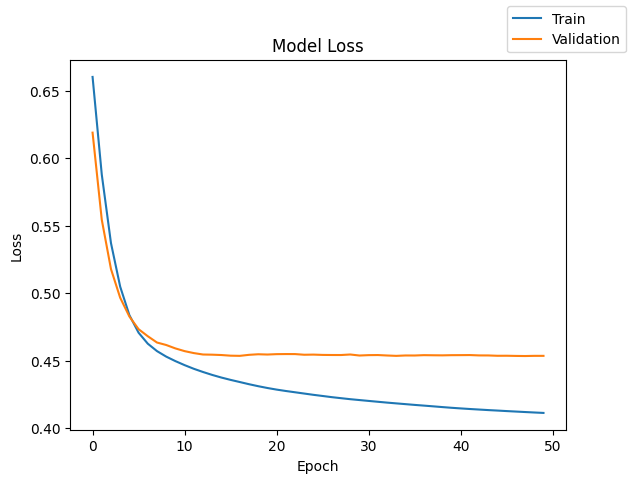

In [601]:
plot(history,'loss')

In [602]:
model_11_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_11_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.807987  0.807987   0.808011  0.807983

In [603]:
model_11_val_perf = model_performance_classification(model, X_val, y_val)
model_11_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.796875  0.796875   0.836055  0.809459

Observations:
- After increase in Epoch and batch size for SMOTE and Adam optimizer, the performance is slightly better than the previous model.
- Recall is 0.807987 for training and 0.796875 for validation dataset.

### Model 12 - Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

Lets add dropout to hidden layers

In [604]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [605]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [606]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [607]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [608]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6931 - val_loss: 0.6663
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6541 - val_loss: 0.6205
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6229 - val_loss: 0.5715
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5930 - val_loss: 0.5499
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5786 - val_loss: 0.5322
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5630 - val_loss: 0.5111
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5517 - val_loss: 0.4985
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5407 - val_loss: 0.4968
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5282 - val_loss: 0.4916
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5284 - val_loss: 0.4896
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5282 - val_loss: 0.4864
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [609]:
print("Time taken in seconds ",end-start)

Time taken in seconds  18.299034357070923


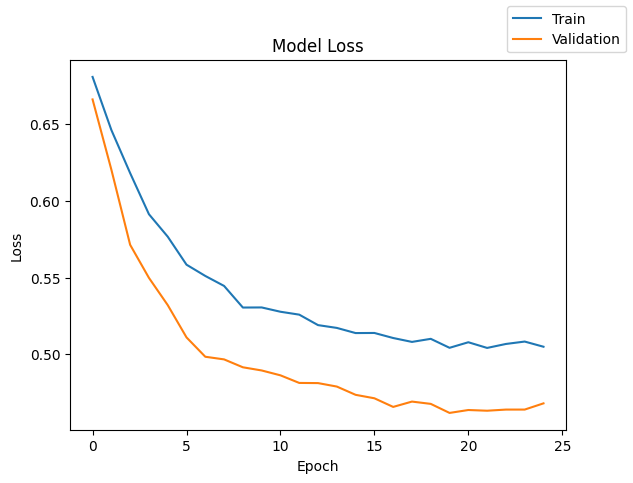

In [610]:
plot(history,'loss')

In [611]:
model_12_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_12_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.785126  0.785126   0.785141  0.785123

In [612]:
model_12_val_perf = model_performance_classification(model, X_val, y_val)
model_12_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.773125  0.773125   0.830208  0.790041

Observations:
- Model hasnt performed well when compared to some of the other models.
- Recall is 0.78526 for training and 0.773125 for validation dataset.

### Model 13 - Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout(dropout to only one hidden layer)

In [613]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [614]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [615]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [616]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [617]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6841 - val_loss: 0.6321
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6061 - val_loss: 0.5592
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5610 - val_loss: 0.5269
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5273 - val_loss: 0.5112
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5078 - val_loss: 0.4911
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4954 - val_loss: 0.4849
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4835 - val_loss: 0.4791
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4765 - val_loss: 0.4768
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4694 - val_loss: 0.4718
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4653 - val_loss: 0.4722
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4623 - val_loss: 0.4665
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [618]:
print("Time taken in seconds ",end-start)

Time taken in seconds  17.973960876464844


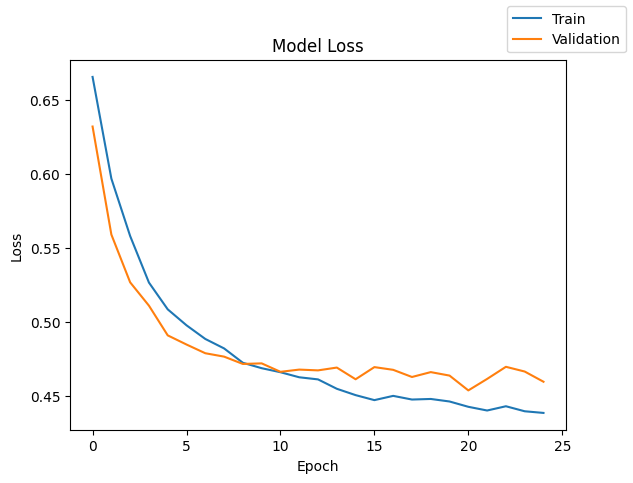

In [619]:
plot(history,'loss')

In [620]:
model_13_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_13_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.806417  0.806417   0.806473  0.806408

In [621]:
model_13_val_perf = model_performance_classification(model, X_val, y_val)
model_13_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.786875  0.786875   0.836198  0.801777

Observations:
 - Model with 1 dropouts is performing better than 2 dropouts.
 - Recall is 0.806417 for training and 0.786875 for validation dataset.
 - Pick Model with 1 dropouts and change the epoch and batch size

### Model 14 - Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, Dropout(dropout to only hidden layer), Change Epochs and Batch Size

In [622]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [623]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [624]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [625]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [626]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=new_batch_size, epochs=new_epochs)
end=time.time()

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6587 - val_loss: 0.6112
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6110 - val_loss: 0.5596
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5732 - val_loss: 0.5366
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5510 - val_loss: 0.5105
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5295 - val_loss: 0.4853
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5086 - val_loss: 0.4764
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4960 - val_loss: 0.4627
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4907 - val_loss: 0.4632
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4842 - val_loss: 0.4626
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4829 - val_loss: 0.4561
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4806 - val_loss: 0.4577
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

In [627]:
print("Time taken in seconds ",end-start)

Time taken in seconds  26.737415552139282


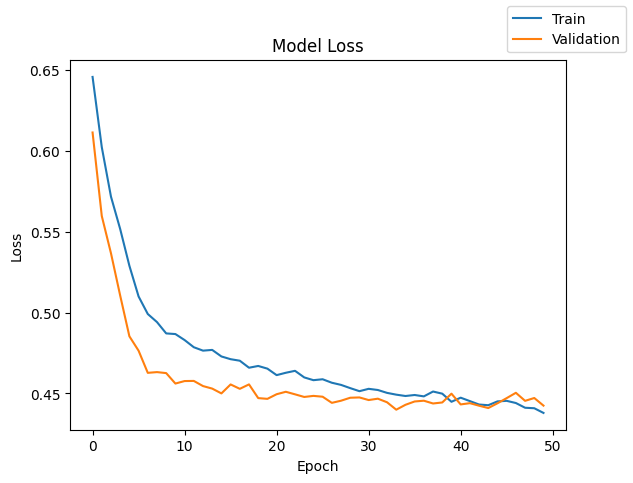

In [628]:
plot(history,'loss')

In [629]:
model_14_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_14_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.807692  0.807692   0.807711  0.807689

In [630]:
model_14_val_perf = model_performance_classification(model, X_val, y_val)
model_14_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0      0.78    0.78   0.831569  0.795649

Observations:
- Not much of change in performance after increasing the epoch/batch size.
- Recall is 0.807692 for training and 0.78 for validation dataset.
- SMOTE Models did not perform well overall when compared to some of the other models.

## Model Performance Comparison and Final Model Selection

In [631]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
        model_7_train_perf.T,
        model_8_train_perf.T,
        model_9_train_perf.T,
        model_10_train_perf.T,
        model_11_train_perf.T,
        model_12_train_perf.T,
        model_13_train_perf.T,
        model_14_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, without class weights)",
    "Neural Network (SGD, with class weights)",
    "Neural Network (SGD with Momentum, with class weights)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network with Adam Optimizer(Change Epoch and Batch Size)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network with Adam Optimizer and Dropout(Only in 1 hidden layer)",
    "Neural Network with Adam Optimizer, Dropout(Only in 1 hidden layer), Change Epochs and Batch Size",
    "Neural Network with Balanced Data (by applying SMOTE), SGD Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE),SGD Optimizer,Change Epoch and Batch Size",
    "Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, Change Epoch and Batch size",
    "Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout",
    "Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout(dropout to only 1 hidden layer)",
    "Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, Dropout(dropout to only 1 hidden layer), Change Epochs and Batch Size"

]

In [640]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        model_0_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
        model_6_val_perf.T,
        model_7_val_perf.T,
        model_8_val_perf.T,
        model_9_val_perf.T,
        model_10_val_perf.T,
        model_11_val_perf.T,
        model_12_val_perf.T,
        model_13_val_perf.T,
        model_14_val_perf.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Neural Network (SGD, without class weights)",
    "Neural Network (SGD, with class weights)",
    "Neural Network (SGD with Momentum, with class weights)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network with Adam Optimizer(Change Epoch and Batch Size)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network with Adam Optimizer and Dropout(Only in 1 hidden layer)",
    "Neural Network with Adam Optimizer, Dropout(Only in 1 hidden layer), Change Epochs and Batch Size",
    "Neural Network with Balanced Data (by applying SMOTE), SGD Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE),SGD Optimizer,Change Epoch and Batch Size",
    "Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, Change Epoch and Batch size",
    "Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout",
    "Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout(dropout to only 1 hidden layer)",
    "Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, Dropout(dropout to only 1 hidden layer), Change Epochs and Batch Size"

]

In [633]:
models_train_comp_df

Neural Network (SGD, without class weights)  \
Accuracy                                      0.796250   
Recall                                        0.796250   
Precision                                     0.634014   
F1 Score                                      0.705931   

           Neural Network (SGD, with class weights)  \
Accuracy                                   0.777500   
Recall                                     0.777500   
Precision                                  0.832367   
F1 Score                                   0.793818   

           Neural Network (SGD with Momentum, with class weights)  \
Accuracy                                            0.812031        
Recall                                              0.812031        
Precision                                           0.845554        
F1 Score                                            0.822852        

           Neural Network (Adam , No Regularization)  \
Accuracy                                    0.859688   
Recall                                      0.859688   
Precision                                   0.851531   
F1 Score                                    0.843477   

           Neural Network with Adam Optimizer(Change Epoch and Batch Size)  \
Accuracy                                            0.859062                 
Recall                                              0.859062                 
Precision                                           0.849094                 
F1 Score                                            0.846678                 

           Neural Network (Adam, dropout [0.4,0.2])  \
Accuracy                                   0.855313   
Recall                                     0.855313   
Precision                                  0.847971   
F1 Score                                   0.835461   

           Neural Network with Adam Optimizer and Dropout(Only in 1 hidden layer)  \
Accuracy                                            0.855938                        
Recall                                              0.855938                        
Precision                                           0.849774                        
F1 Score                                            0.835303                        

           Neural Network with Adam Optimizer, Dropout(Only in 1 hidden layer), Change Epochs and Batch Size  \
Accuracy                                            0.863906                                                   
Recall                                              0.863906                                                   
Precision                                           0.855526                                                   
F1 Score                                            0.850778                                                   

           Neural Network with Balanced Data (by applying SMOTE), SGD Optimizer  \
Accuracy                                            0.769231                      
Recall                                              0.769231                      
Precision                                           0.769428                      
F1 Score                                            0.769188                      

           Neural Network with Balanced Data (by applying SMOTE),SGD Optimizer,Change Epoch and Batch Size  \
Accuracy                                            0.783458                                                 
Recall                                              0.783458                                                 
Precision                                           0.783461                                                 
F1 Score                                            0.783457                                                 

           Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer  \
Accuracy                                            0.806711                          
Recall                

In [641]:
models_val_comp_df

Neural Network (SGD, without class weights)  \
Accuracy                                      0.796250   
Recall                                        0.796250   
Precision                                     0.634014   
F1 Score                                      0.705931   

           Neural Network (SGD, with class weights)  \
Accuracy                                   0.781250   
Recall                                     0.781250   
Precision                                  0.833338   
F1 Score                                   0.796914   

           Neural Network (SGD with Momentum, with class weights)  \
Accuracy                                            0.803125        
Recall                                              0.803125        
Precision                                           0.833083        
F1 Score                                            0.813496        

           Neural Network (Adam , No Regularization)  \
Accuracy                                    0.847500   
Recall                                      0.847500   
Precision                                   0.836086   
F1 Score                                    0.827564   

           Neural Network with Adam Optimizer(Change Epoch and Batch Size)  \
Accuracy                                            0.841875                 
Recall                                              0.841875                 
Precision                                           0.827511                 
F1 Score                                            0.826503                 

           Neural Network (Adam, dropout [0.4,0.2])  \
Accuracy                                   0.843750   
Recall                                     0.843750   
Precision                                  0.832212   
F1 Score                                   0.820695   

           Neural Network with Adam Optimizer and Dropout(Only in 1 hidden layer)  \
Accuracy                                            0.844375                        
Recall                                              0.844375                        
Precision                                           0.833886                        
F1 Score                                            0.820434                        

           Neural Network with Adam Optimizer, Dropout(Only in 1 hidden layer), Change Epochs and Batch Size  \
Accuracy                                            0.850000                                                   
Recall                                              0.850000                                                   
Precision                                           0.837950                                                   
F1 Score                                            0.834656                                                   

           Neural Network with Balanced Data (by applying SMOTE), SGD Optimizer  \
Accuracy                                            0.767500                      
Recall                                              0.767500                      
Precision                                           0.834171                      
F1 Score                                            0.786109                      

           Neural Network with Balanced Data (by applying SMOTE),SGD Optimizer,Change Epoch and Batch Size  \
Accuracy                                            0.781250                                                 
Recall                                              0.781250                                                 
Precision                                           0.832699                                                 
F1 Score                                            0.796810                                                 

           Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer  \
Accuracy                                            0.783125                          
Recall                

Observations:

  Lets choose the top 5 models with higher recall score on validation dataset

  1. Neural Network with Adam Optimizer, Dropout(Only in 1 hidden layer), Change Epochs and Batch Size - Recall is 0.850000
  2. Neural Network (Adam , No Regularization) - Recall is 0.847500
  3. Neural Network with Adam Optimizer and Dropout(Only in 1 hidden layer) - Recall is 0.844375
  4. Neural Network (Adam, dropout [0.4,0.2]) - Recall is 0.843750
  5. Neural Network with Adam Optimizer(Change Epoch and Batch Size) - Recall is 0.841875


  The top model is Neural Network with Adam Optimizer, Dropout(Only in 1 hidden layer), Change Epochs(50) and Batch Size(100) since it generalizes better when compared to other model. The Recall on validation dataset is 0.85 and on training dataset,its 0.863906.


**Final Model**

In [642]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [643]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [644]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [645]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [646]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=new_batch_size, epochs=new_epochs)
end=time.time()

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6390 - val_loss: 0.5463
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5345 - val_loss: 0.4759
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4912 - val_loss: 0.4517
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4752 - val_loss: 0.4396
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4595 - val_loss: 0.4315
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4533 - val_loss: 0.4251
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4443 - val_loss: 0.4182
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4328 - val_loss: 0.4111
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4251 - val_loss: 0.4040
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4218 - val_loss: 0.3965
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4085 - val_loss: 0.3899
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4059 - val_l

In [648]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [649]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      5096
         1.0       0.79      0.49      0.60      1304

    accuracy                           0.87      6400
   macro avg       0.83      0.73      0.76      6400
weighted avg       0.86      0.87      0.86      6400



In [650]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_val,y_val_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1274
         1.0       0.73      0.42      0.53       326

    accuracy                           0.85      1600
   macro avg       0.80      0.69      0.72      1600
weighted avg       0.84      0.85      0.83      1600



In [651]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      1593
         1.0       0.76      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



Observations:
- Recall(Weighted Avg) for the final model as follows
     - Training - 0.87
     - Validation - 0.85
     - Testing - 0.86

We see that the model is able to generalize well with the test dataset.

## Actionable Insights and Business Recommendations

- Recommend the the final model to the bank . This model helps reduce False Negatives.It has genarlized well with test data and has the highest recall score of 86% with test dataset.
- We saw in our analysis that customers who churned , the highest no. of customers in that category were not active members. Bank should reach out to customers who are not active with different schemes to keep the customer engaged with the bank.
- Banks should come up with new marketing strategies to attract customers to use more of their products thereby keeping the customers engaged with the bank.
- The bank is doing well in France and has the highest customers base. Banks in Germany and Spain can interact with bank location in France to see if they are doing things differently and learn from Germany location.

<font size=6 color='blue'>Power Ahead</font>
___